# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

In [3]:
file_db = "~/Downloads/chinook.sqlite"
model_name = 'qwen2.5'

clean_and_train = True  # False  

In [4]:
config = {
    'model': model_name,   # 'mistral' # "starcoder2"
}
vn = MyVanna(config=config)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: papa-game


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

In [9]:
def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

In [10]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [11]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [12]:
df_ddl

,type,sql
0,table,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...
1,table,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
2,table,CREATE TABLE [Customer]\n(\n [CustomerId] I...
3,table,CREATE TABLE [Employee]\n(\n [EmployeeId] I...
4,table,CREATE TABLE [Genre]\n(\n [GenreId] INTEGER...
5,table,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...
6,table,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...
7,table,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...
8,table,CREATE TABLE [Playlist]\n(\n [PlaylistId] I...
9,table,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...


In [13]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")


Adding ddl: CREATE TABLE Album
(
    AlbumId INTEGER  NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),
    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE Artist
(
    ArtistId INTEGER  NOT NULL,
    Name NVARCHAR(120),
    CONSTRAINT PK_Artist PRIMARY KEY  (ArtistId)
)
Adding ddl: CREATE TABLE Customer
(
    CustomerId INTEGER  NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),
    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl:

In [14]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,00e3136b-f688-5ae4-a2bb-3354635261fc-ddl,None,CREATE INDEX IFK_CustomerSupportRepId ON Custo...,ddl
1,04a3d9eb-fab7-5641-96a1-ae7924ae05e5-ddl,None,CREATE INDEX IFK_EmployeeReportsTo ON Employee...,ddl
2,11439f95-bfbc-530c-8b7f-91f9e45d2877-ddl,None,CREATE TABLE Track\n(\n TrackId INTEGER NO...,ddl
3,29f57d6d-552a-5cc2-8c8c-cb78918d1646-ddl,None,CREATE TABLE Genre\n(\n GenreId INTEGER NO...,ddl
4,33d9efb0-969c-59b8-95f1-04b3e0ddd2df-ddl,None,CREATE INDEX IFK_TrackAlbumId ON Track (AlbumId),ddl
5,37bc3b25-2dc1-5160-bcae-baf85b93f023-ddl,None,CREATE TABLE InvoiceLine\n(\n InvoiceLineId...,ddl
6,4893f9e4-2275-53cb-89da-43de3063acf1-ddl,None,CREATE TABLE PlaylistTrack\n(\n PlaylistId ...,ddl
7,82dfbbaf-4fe6-5213-8c5a-2e765f459ca1-ddl,None,CREATE TABLE Artist\n(\n ArtistId INTEGER ...,ddl
8,8a3cbf5f-a4d9-5429-93de-e49ef72c5bd5-ddl,None,CREATE TABLE Customer\n(\n CustomerId INTEG...,ddl
9,93344862-5b4e-5a02-8c70-982b08c6badf-ddl,None,CREATE INDEX IFK_InvoiceLineInvoiceId ON Invoi...,ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [15]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Playlist\n(\n    PlaylistId INTEGER  NOT NULL,\n    Name NVARCHAR(120),\n    CONSTRAINT PK_Playlist PRIMARY KEY  (PlaylistId)\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaTyp

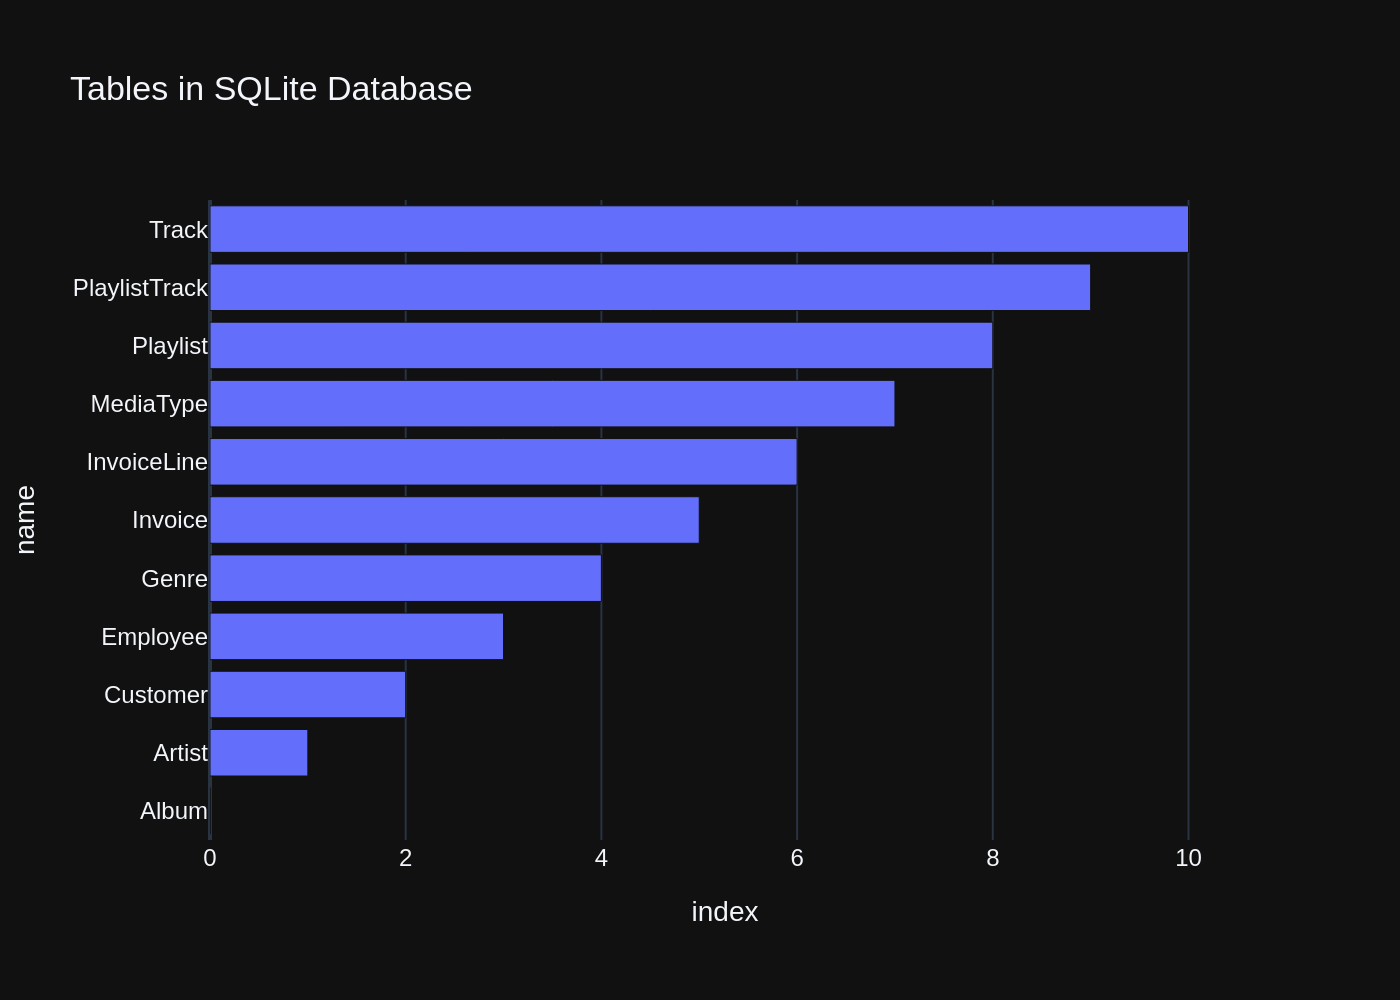

("SELECT name FROM sqlite_master WHERE type='table'",
              name
 0           Album
 1          Artist
 2        Customer
 3        Employee
 4           Genre
 5         Invoice
 6     InvoiceLine
 7       MediaType
 8        Playlist
 9   PlaylistTrack
 10          Track,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'index=%{x}<br>name=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'h',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
               'xaxis': 'x',
               'y': array(['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice',
                           'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']

In [16]:
vn.ask(question="Can you list all tables in the SQLite database catalog?")

In [17]:
vn.ask(question="which table stores customer's orders")

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON Customer (SupportRepId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n

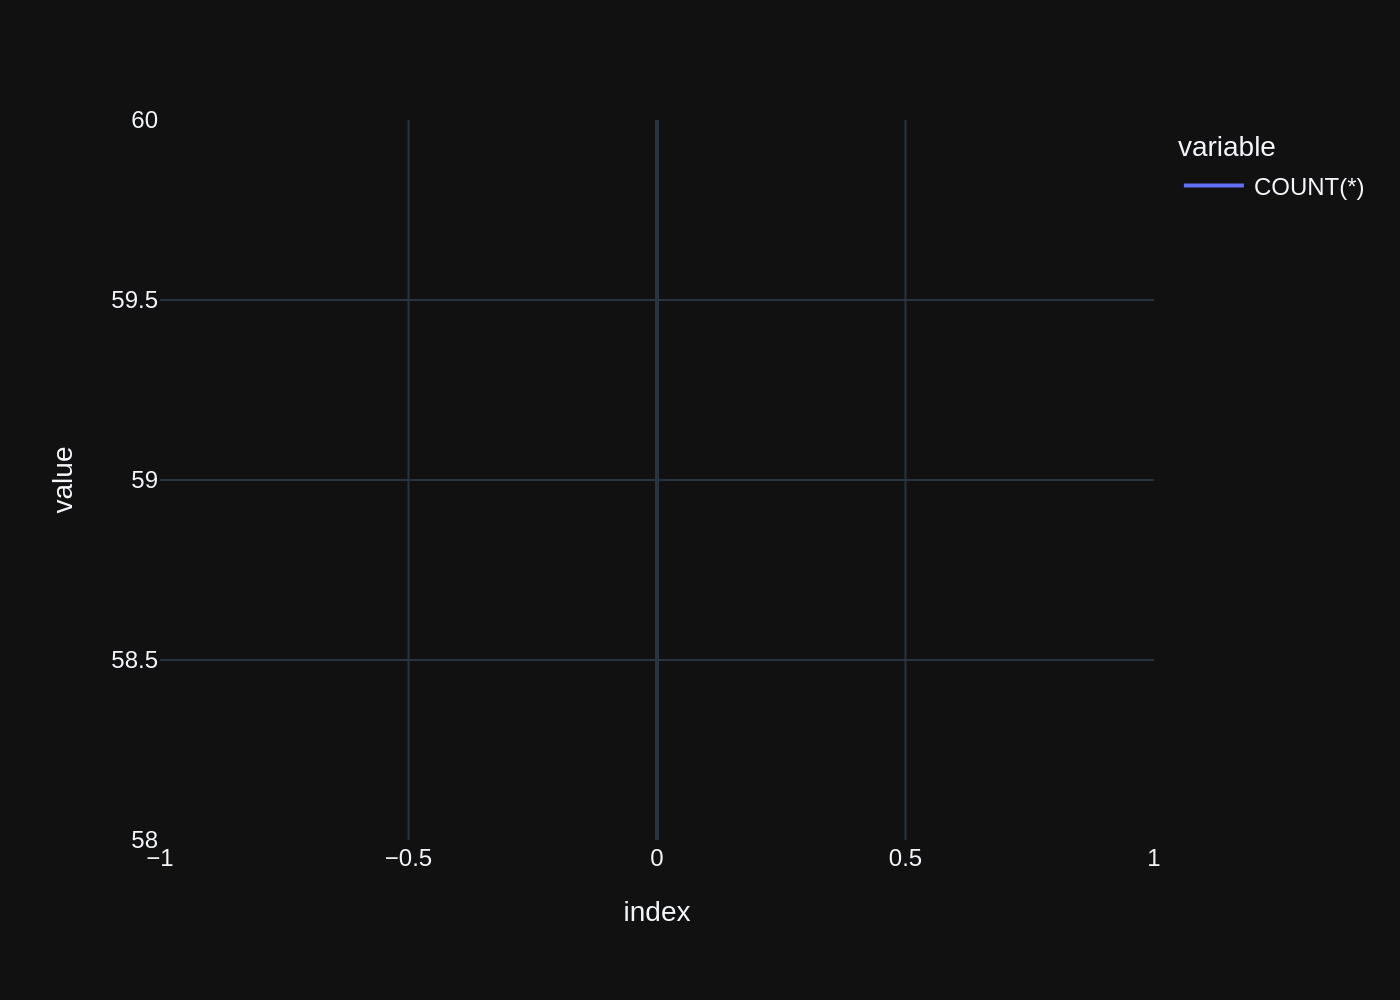

('SELECT COUNT(*) FROM Customer',
    COUNT(*)
 0        59,
 Figure({
     'data': [{'hovertemplate': 'variable=COUNT(*)<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'COUNT(*)',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'COUNT(*)',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0]),
               'xaxis': 'x',
               'y': array([59]),
               'yaxis': 'y'}],
     'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
 }))

In [18]:
vn.ask(question="How many customers are there")

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70)

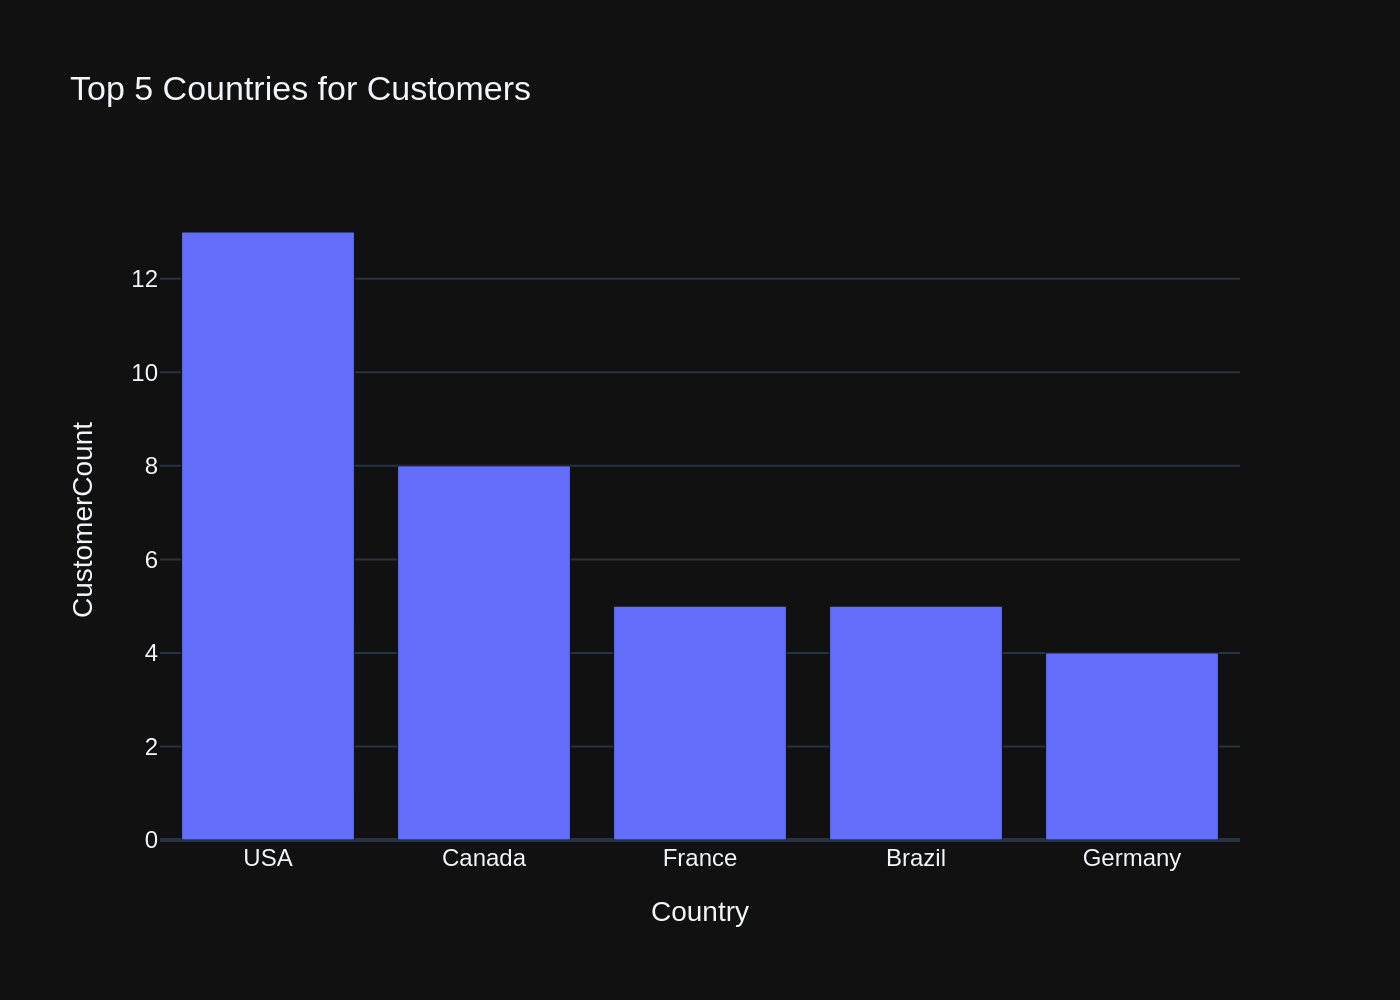

('SELECT Country, COUNT(*) AS CustomerCount FROM Customer GROUP BY Country ORDER BY CustomerCount DESC LIMIT 5',
    Country  CustomerCount
 0      USA             13
 1   Canada              8
 2   France              5
 3   Brazil              5
 4  Germany              4,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Country=%{x}<br>CustomerCount=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['USA', 'Canada', 'France', 'Brazil', 'Germany'], dtype=object),
               'xaxis': 'x',
               'y': array([13,  8,  5,  5,  4]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap

In [19]:
vn.ask(question="what are the top 5 countries that customers come from?")

### More SQL questions

see `sample-sql-queries-sqlite-chinook.ipynb`

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON Album (ArtistId)\n\nCREATE TABLE Album\n(\n    AlbumId INTEGER  NOT NULL,\n    Title NVARCHAR(160)  NOT NULL,\n    ArtistId INTEGER  NOT NULL,\n    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),\n    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON

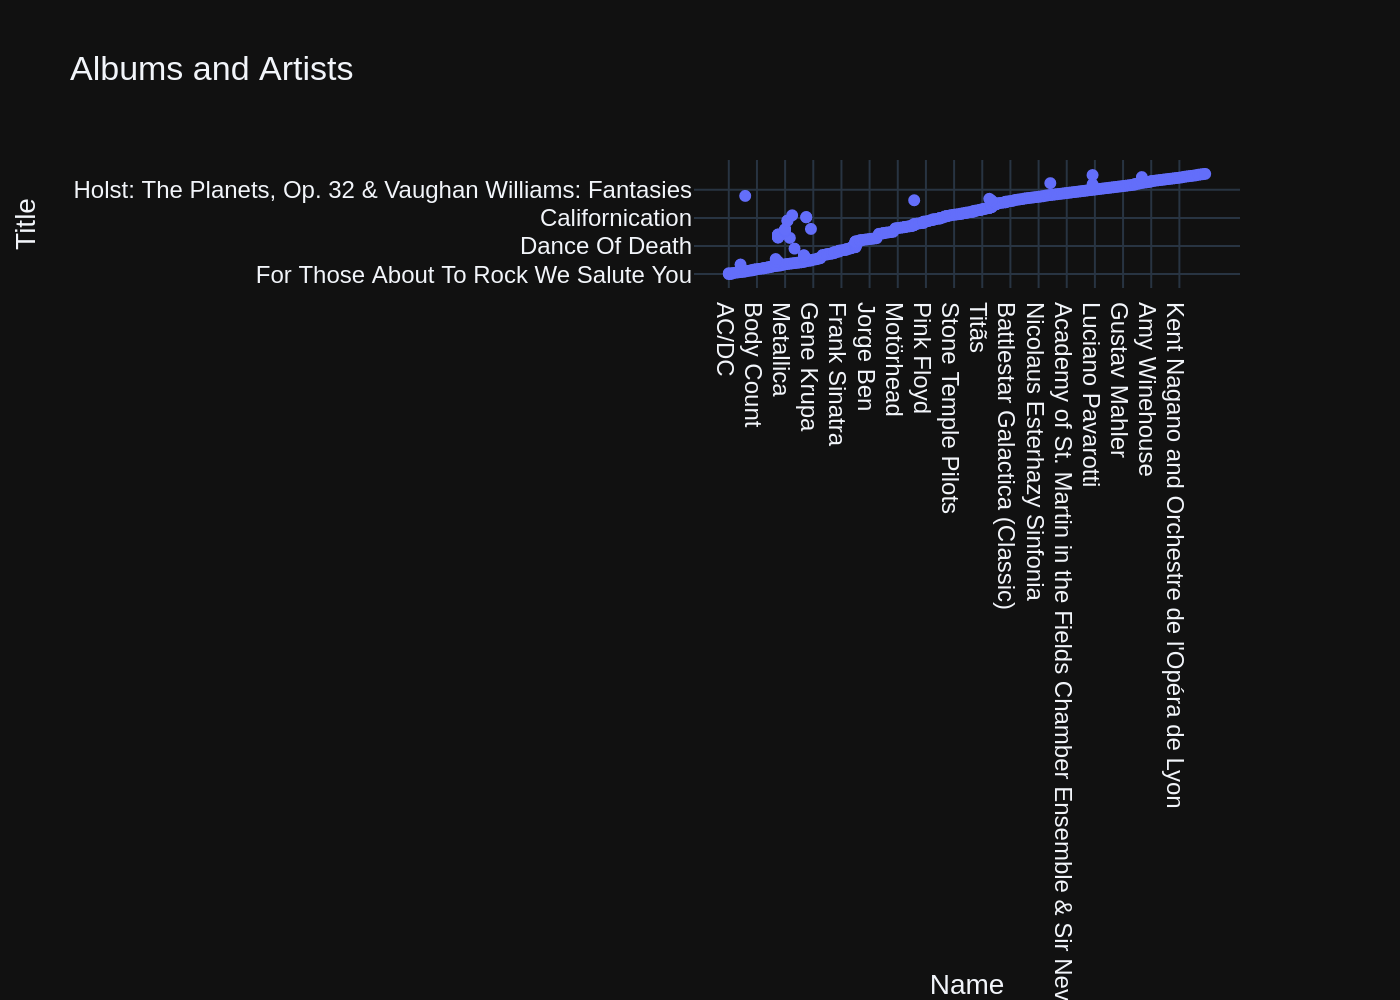

('SELECT Album.Title, Artist.Name FROM Album JOIN Artist ON Album.ArtistId = Artist.ArtistId',
                                                  Title  \
 0                For Those About To Rock We Salute You   
 1                                    Balls to the Wall   
 2                                    Restless and Wild   
 3                                    Let There Be Rock   
 4                                             Big Ones   
 ..                                                 ...   
 342                             Respighi:Pines of Rome   
 343  Schubert: The Late String Quartets & String Qu...   
 344                                Monteverdi: L'Orfeo   
 345                              Mozart: Chamber Music   
 346  Koyaanisqatsi (Soundtrack from the Motion Pict...   
 
                                                   Name  
 0                                                AC/DC  
 1                                               Accept  
 2                   

In [20]:
question = """  
    List all albums and their corresponding artist names  
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON Track (GenreId)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackAlb

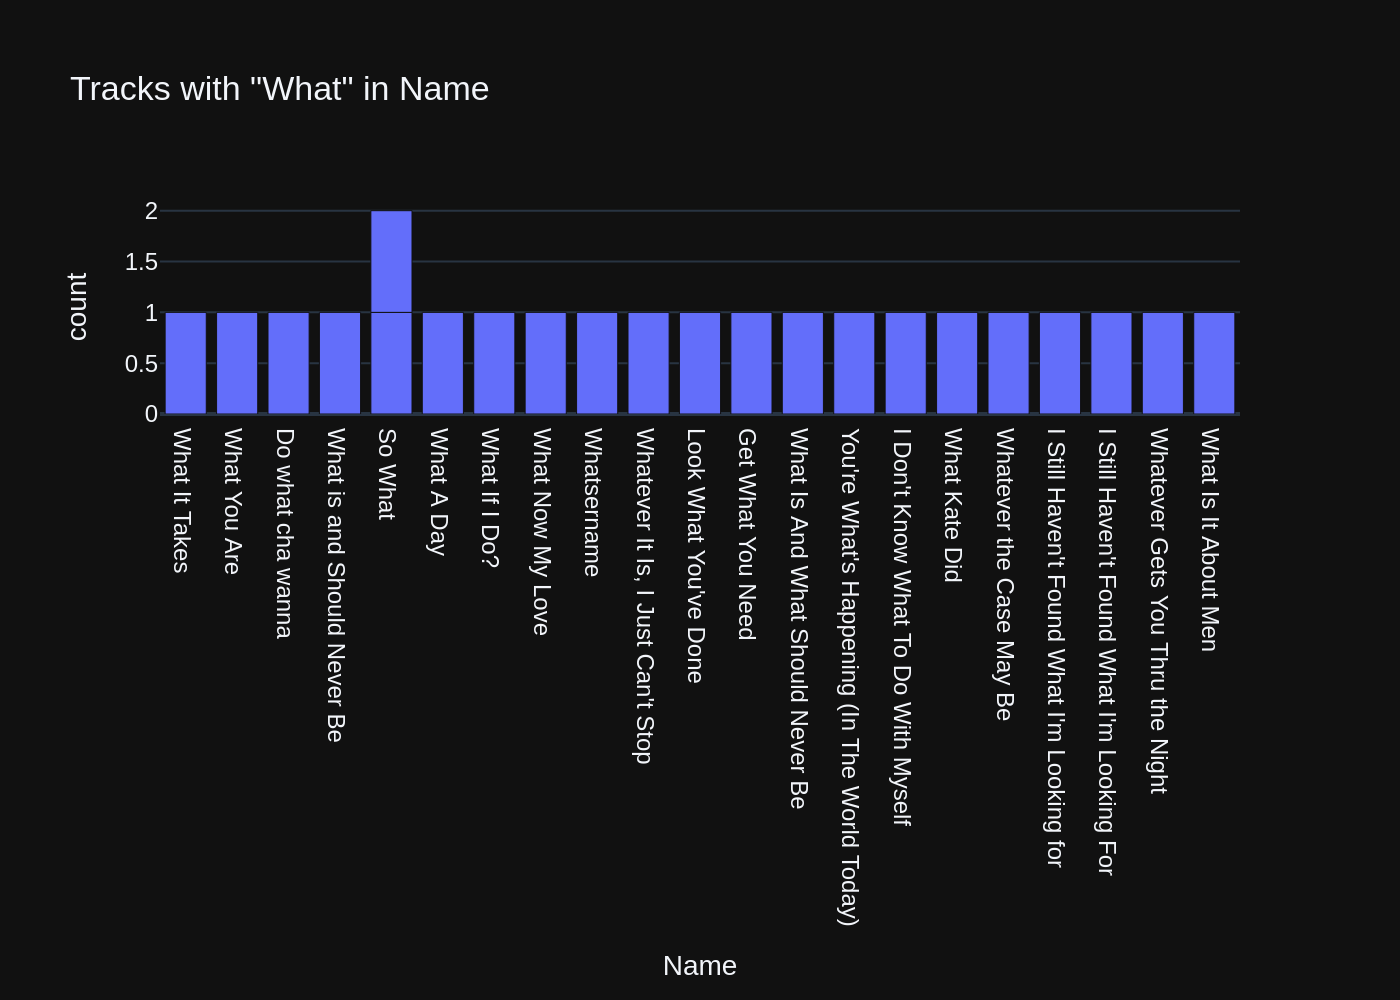

("SELECT Name FROM Track WHERE LOWER(Name) LIKE '%what%'",
                                             Name
 0                                  What It Takes
 1                                   What You Are
 2                              Do what cha wanna
 3                    What is and Should Never Be
 4                                        So What
 5                                     What A Day
 6                                  What If I Do?
 7                               What Now My Love
 8                                    Whatsername
 9              Whatever It Is, I Just Can't Stop
 10                         Look What You've Done
 11                             Get What You Need
 12              What Is And What Should Never Be
 13  You're What's Happening (In The World Today)
 14                                       So What
 15           I Don't Know What To Do With Myself
 16                                 What Kate Did
 17                      Whatever the Cas

In [21]:
question = """  
    Find all tracks with a name containing "What" (case-insensitive)
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_InvoiceCustomerId ON Invoice (CustomerId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    Trac

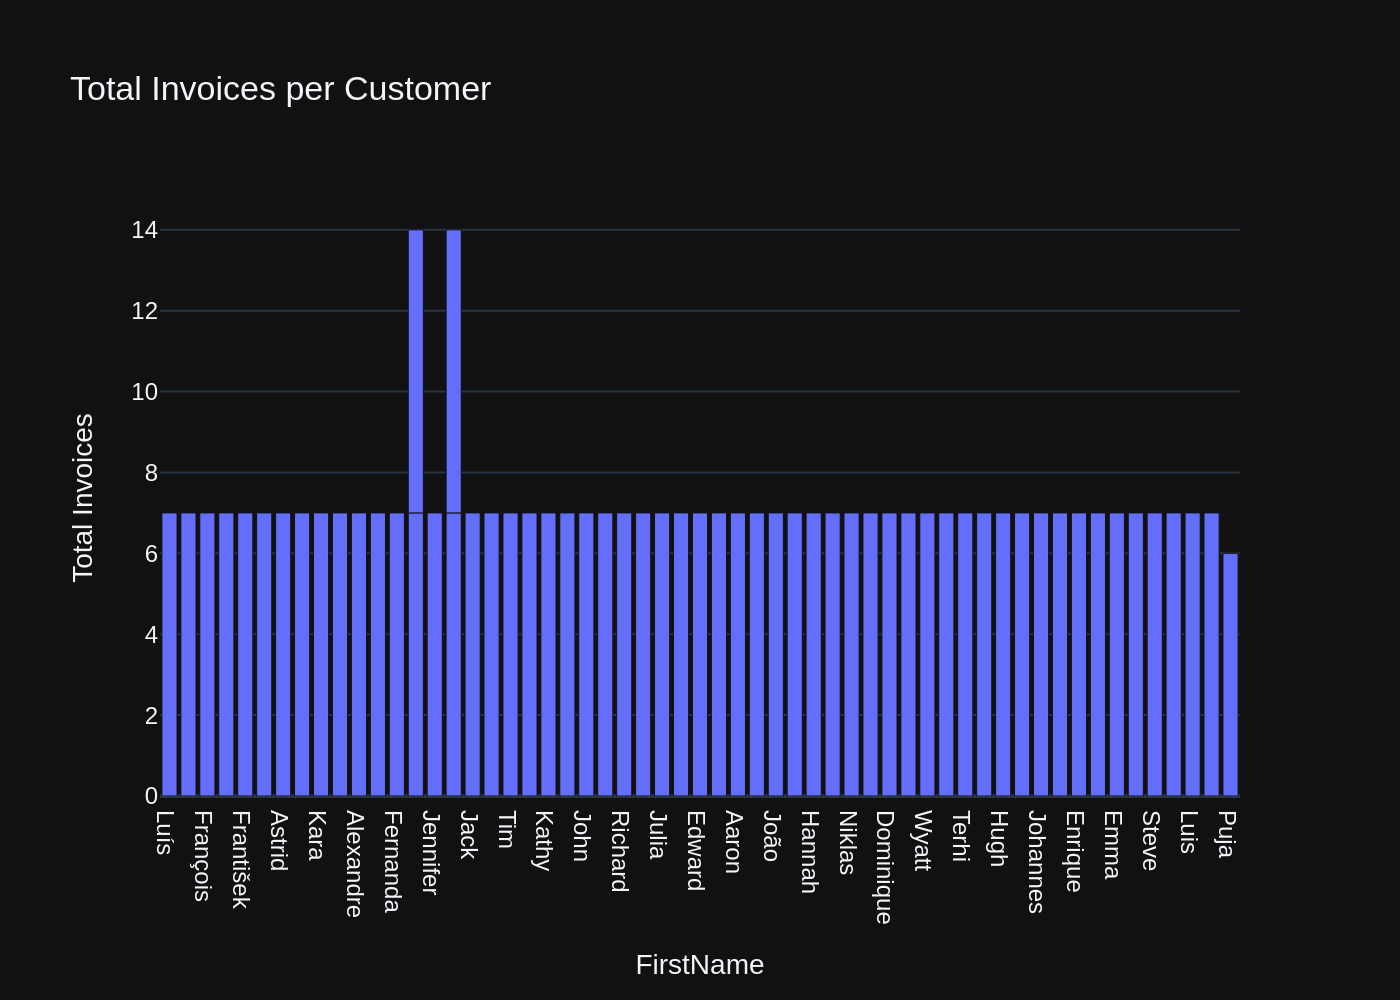

('SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount FROM Customer c LEFT JOIN Invoice i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY InvoiceCount DESC',
     CustomerId  FirstName      LastName  InvoiceCount
 0            1       Luís     Gonçalves             7
 1            2     Leonie        Köhler             7
 2            3   François      Tremblay             7
 3            4      Bjørn        Hansen             7
 4            5  František   Wichterlová             7
 5            6     Helena          Holý             7
 6            7     Astrid        Gruber             7
 7            8       Daan       Peeters             7
 8            9       Kara       Nielsen             7
 9           10    Eduardo       Martins             7
 10          11  Alexandre         Rocha             7
 11          12    Roberto       Almeida             7
 12          13   Fernanda         Ramos             7
 13 

In [22]:
question = """  
    Get the total number of invoices for each customer
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE INDEX IFK_InvoiceCustomerId ON Invoice (CustomerId)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    Trac

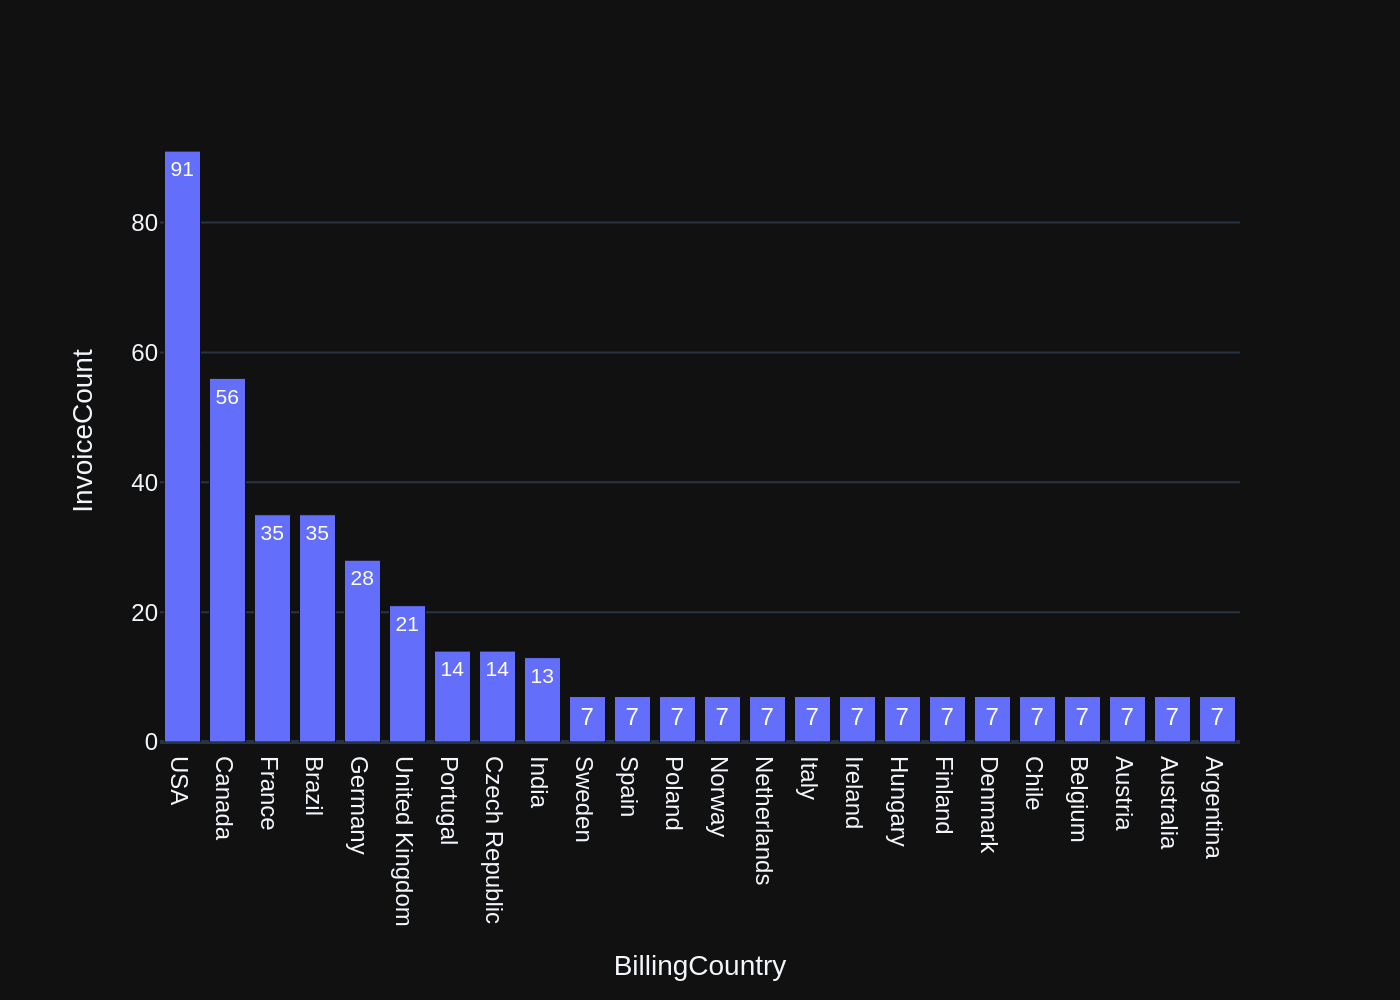

('SELECT BillingCountry, COUNT(*) AS InvoiceCount FROM Invoice GROUP BY BillingCountry ORDER BY InvoiceCount DESC',
     BillingCountry  InvoiceCount
 0              USA            91
 1           Canada            56
 2           France            35
 3           Brazil            35
 4          Germany            28
 5   United Kingdom            21
 6         Portugal            14
 7   Czech Republic            14
 8            India            13
 9           Sweden             7
 10           Spain             7
 11          Poland             7
 12          Norway             7
 13     Netherlands             7
 14           Italy             7
 15         Ireland             7
 16         Hungary             7
 17         Finland             7
 18         Denmark             7
 19           Chile             7
 20         Belgium             7
 21         Austria             7
 22       Australia             7
 23       Argentina             7,
 Figure({
     'data': [{'alignme

In [23]:
question = """  
    Find the total number of invoices per country:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    TrackId INTEGER  NOT NULL,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    Quantity INTEGER  NOT NULL,\n    CONSTRAINT PK_InvoiceLine PRIMARY KEY  (InvoiceLineId),\n    FOREIGN KEY (InvoiceId) REFERENCES Invoice (InvoiceId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (TrackId) REFERENCES Track (TrackId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),

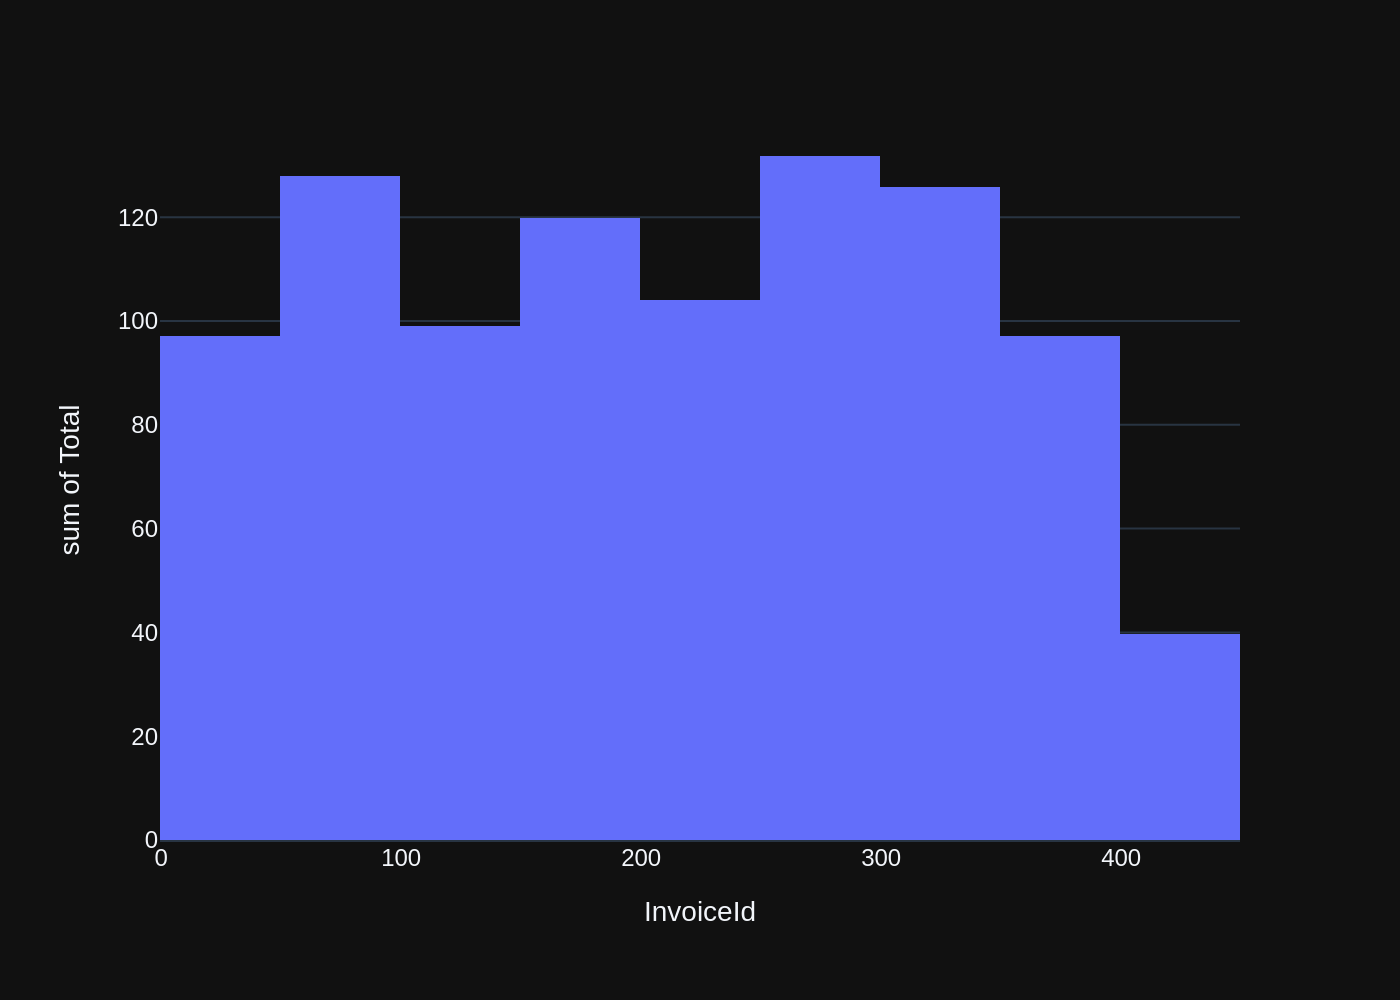

('SELECT * FROM Invoice WHERE Total > 10',
     InvoiceId  CustomerId          InvoiceDate             BillingAddress  \
 0           5          23  2009-01-11 00:00:00            69 Salem Street   
 1          12           2  2009-02-11 00:00:00    Theodor-Heuss-Straße 34   
 2          19          40  2009-03-14 00:00:00             8, Rue Hanovre   
 3          26          19  2009-04-14 00:00:00            1 Infinite Loop   
 4          33          57  2009-05-15 00:00:00            Calle Lira, 198   
 ..        ...         ...                  ...                        ...   
 59        383          10  2013-08-12 00:00:00  Rua Dr. Falcão Filho, 155   
 60        390          48  2013-09-12 00:00:00      Lijnbaansgracht 120bg   
 61        397          27  2013-10-13 00:00:00            1033 N Park Ave   
 62        404           6  2013-11-13 00:00:00              Rilská 3174/6   
 63        411          44  2013-12-14 00:00:00            Porthaninkatu 9   
 
    BillingCity Bil

In [24]:
question = """  
    List all invoices with a total exceeding $10:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    TrackId INTEGER  NOT NULL,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    Quantity INTEGER  NOT NULL,\n    CONSTRAINT PK_InvoiceLine PRI

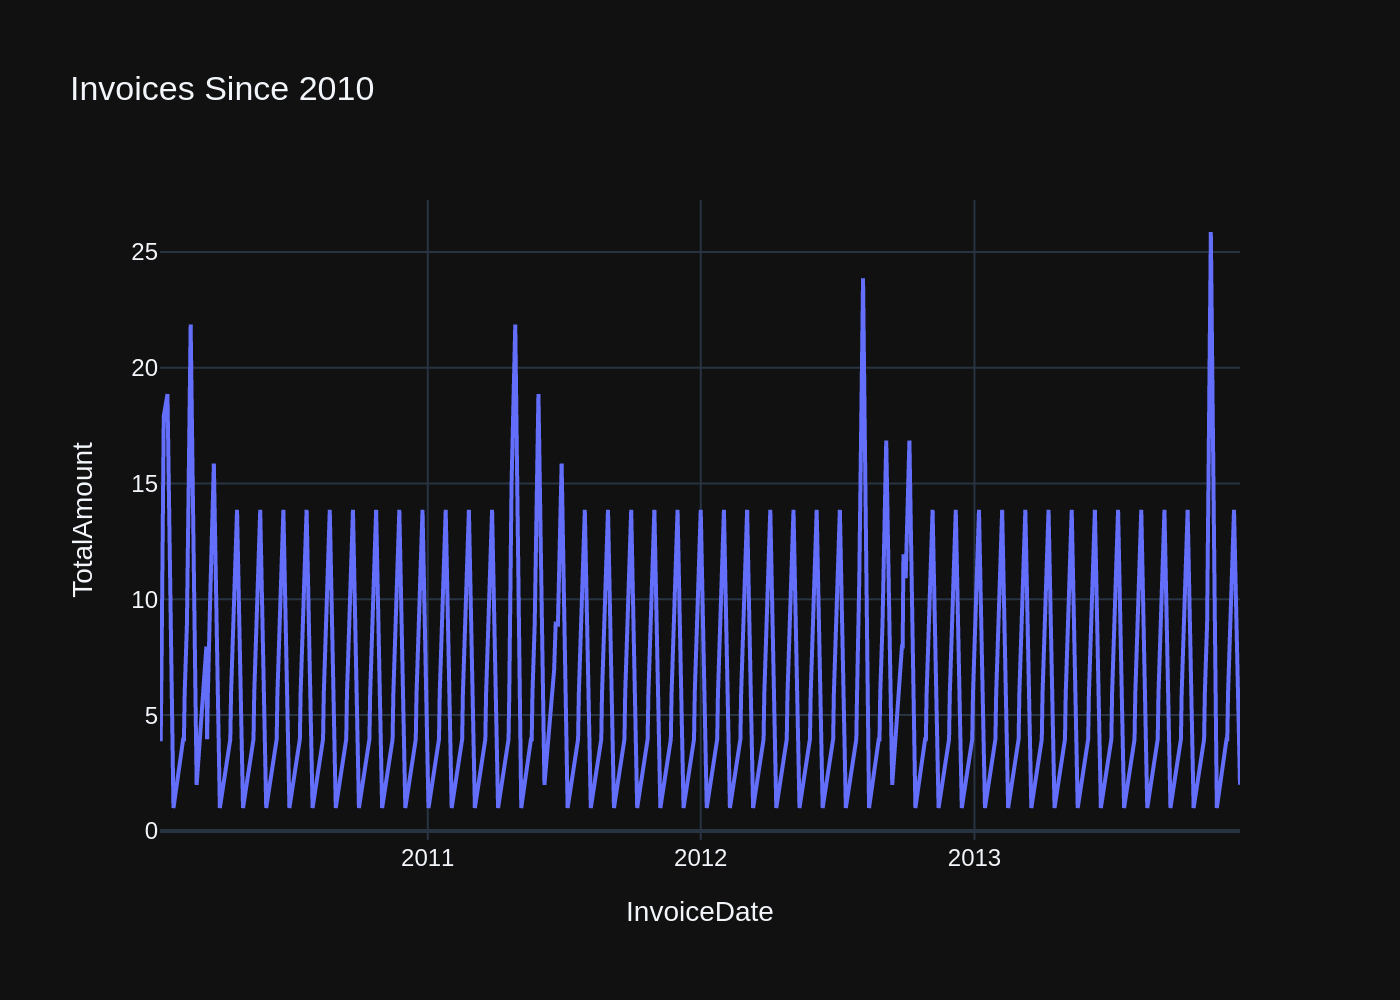

("SELECT InvoiceDate, SUM(Total) AS TotalAmount FROM Invoice WHERE InvoiceDate >= '2010-01-01' GROUP BY InvoiceDate ORDER BY InvoiceDate",
              InvoiceDate  TotalAmount
 0    2010-01-08 00:00:00         3.96
 1    2010-01-09 00:00:00         3.96
 2    2010-01-10 00:00:00         6.94
 3    2010-01-13 00:00:00        17.91
 4    2010-01-18 00:00:00        18.86
 ..                   ...          ...
 277  2013-12-05 00:00:00         3.96
 278  2013-12-06 00:00:00         5.94
 279  2013-12-09 00:00:00         8.91
 280  2013-12-14 00:00:00        13.86
 281  2013-12-22 00:00:00         1.99
 
 [282 rows x 2 columns],
 Figure({
     'data': [{'hovertemplate': 'InvoiceDate=%{x}<br>TotalAmount=%{y}<extra></extra>',
               'legendgroup': '',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': '',
               'orientation': 'v',
               'showlegend': Fal

In [25]:
question = """  
    Find all invoices since 2010 and the total amount invoiced:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON Employee (ReportsTo)\n\nCREATE TABLE Employee\n(\n    EmployeeId INTEGER  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    FirstName NVARCHAR(20)  NOT NULL,\n    Title NVARCHAR(30),\n    ReportsTo INTEGER,\n    BirthDate DATETIME,\n    HireDate DATETIME,\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60),\n    CONSTRAINT PK_Employee PRIMARY KEY  (EmployeeId),\n    FOREIGN KEY (ReportsTo) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    Firs

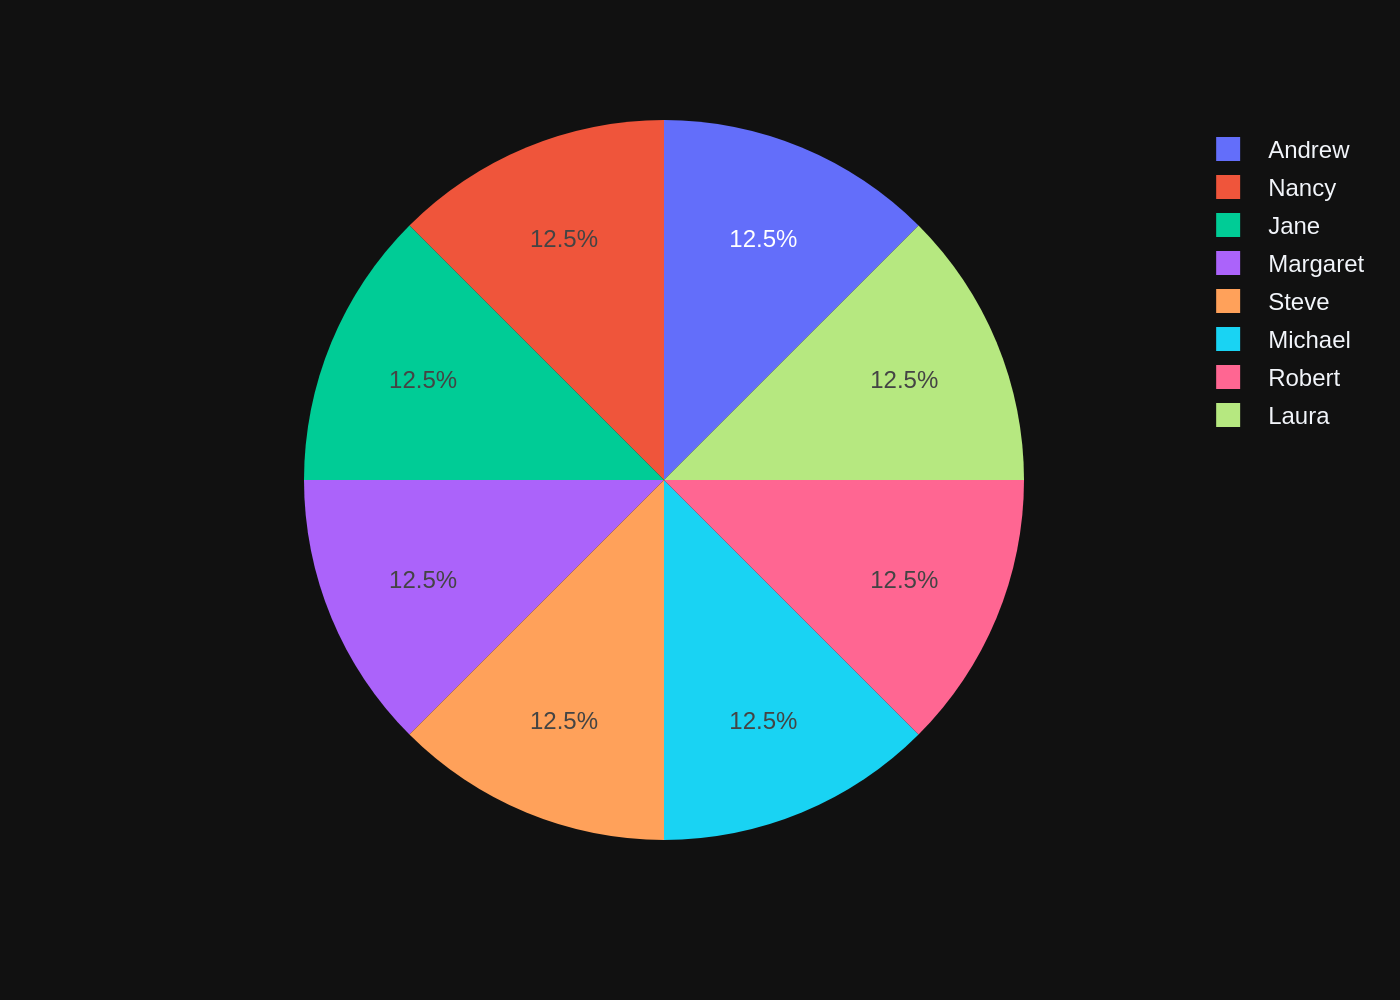

('SELECT e1.FirstName, e1.LastName, e2.FirstName AS ManagerFirstName, e2.LastName AS ManagerLastName \nFROM Employee e1\nLEFT JOIN Employee e2 ON e1.ReportsTo = e2.EmployeeId',
   FirstName  LastName ManagerFirstName ManagerLastName
 0    Andrew     Adams             None            None
 1     Nancy   Edwards           Andrew           Adams
 2      Jane   Peacock            Nancy         Edwards
 3  Margaret      Park            Nancy         Edwards
 4     Steve   Johnson            Nancy         Edwards
 5   Michael  Mitchell           Andrew           Adams
 6    Robert      King          Michael        Mitchell
 7     Laura  Callahan          Michael        Mitchell,
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'FirstName=%{label}<extra></extra>',
               'labels': array(['Andrew', 'Nancy', 'Jane', 'Margaret', 'Steve', 'Michael', 'Robert',
                                'Laura'], dtype=object),
               'lege

In [26]:
question = """  
    List all employees and their reporting manager's name (if any):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_InvoiceCustomerId ON Invoice (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    Trac

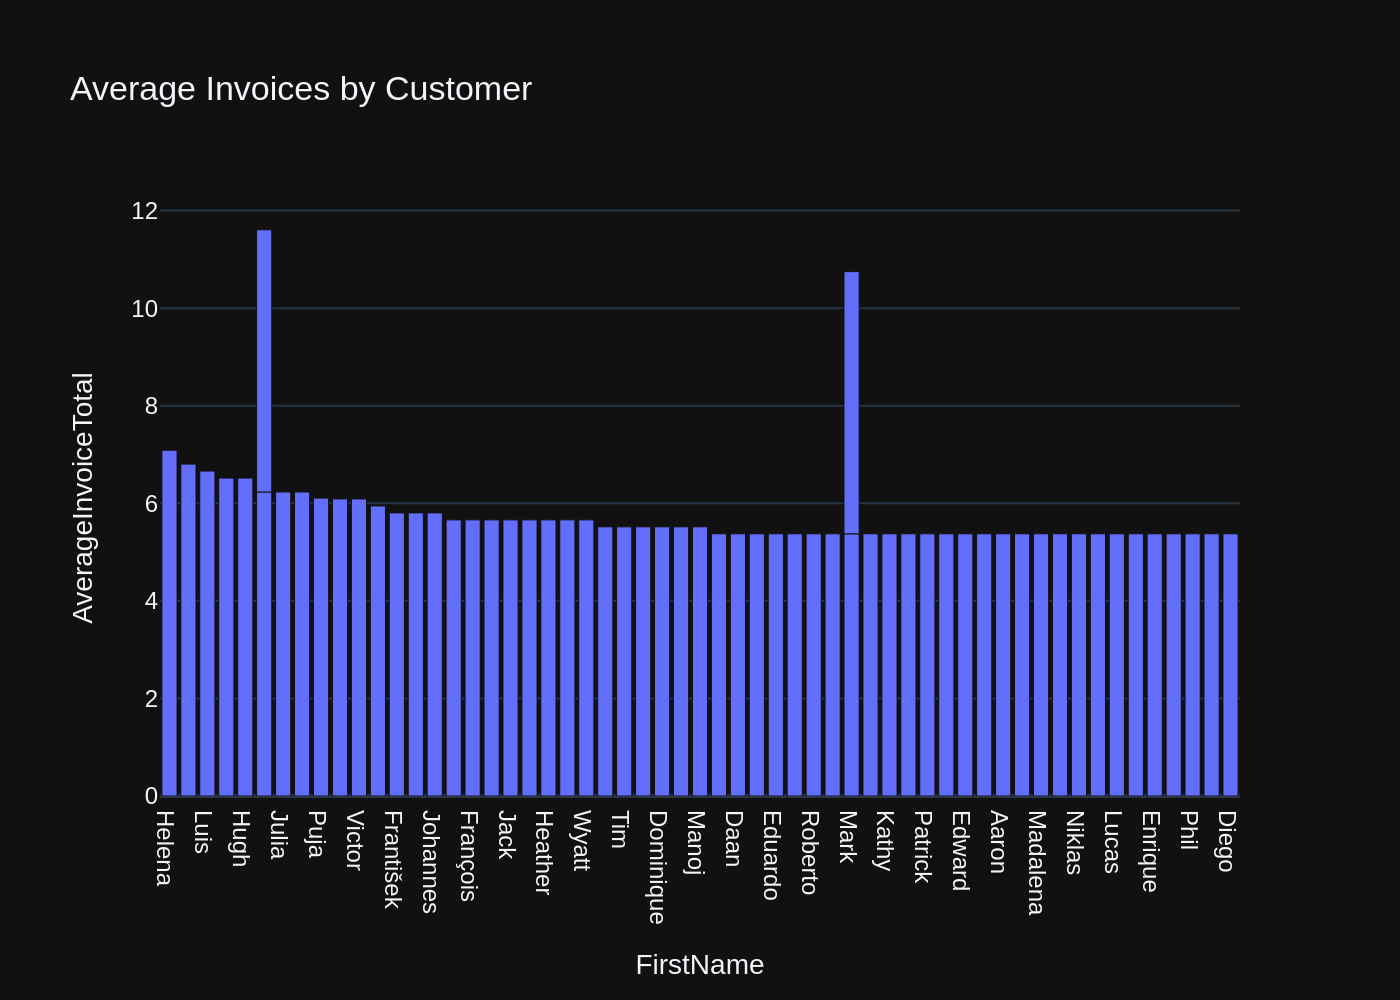

('SELECT c.CustomerId, c.FirstName, c.LastName, AVG(i.Total) AS AverageInvoiceTotal \nFROM Customer c \nLEFT JOIN Invoice i ON c.CustomerId = i.CustomerId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY AverageInvoiceTotal DESC',
     CustomerId  FirstName      LastName  AverageInvoiceTotal
 0            6     Helena          Holý             7.088571
 1           26    Richard    Cunningham             6.802857
 2           57       Luis         Rojas             6.660000
 3           45   Ladislav        Kovács             6.517143
 4           46       Hugh      O'Reilly             6.517143
 5           24      Frank       Ralston             6.231429
 6           28      Julia       Barnett             6.231429
 7           37       Fynn    Zimmermann             6.231429
 8           59       Puja    Srivastava             6.106667
 9            7     Astrid        Gruber             6.088571
 10          25     Victor       Stevens             6.088571
 11          4

In [27]:
question = """  
    Get the average invoice total for each customer:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackAlbumId ON Track (AlbumId)\n\nCREATE INDEX IFK_TrackGen

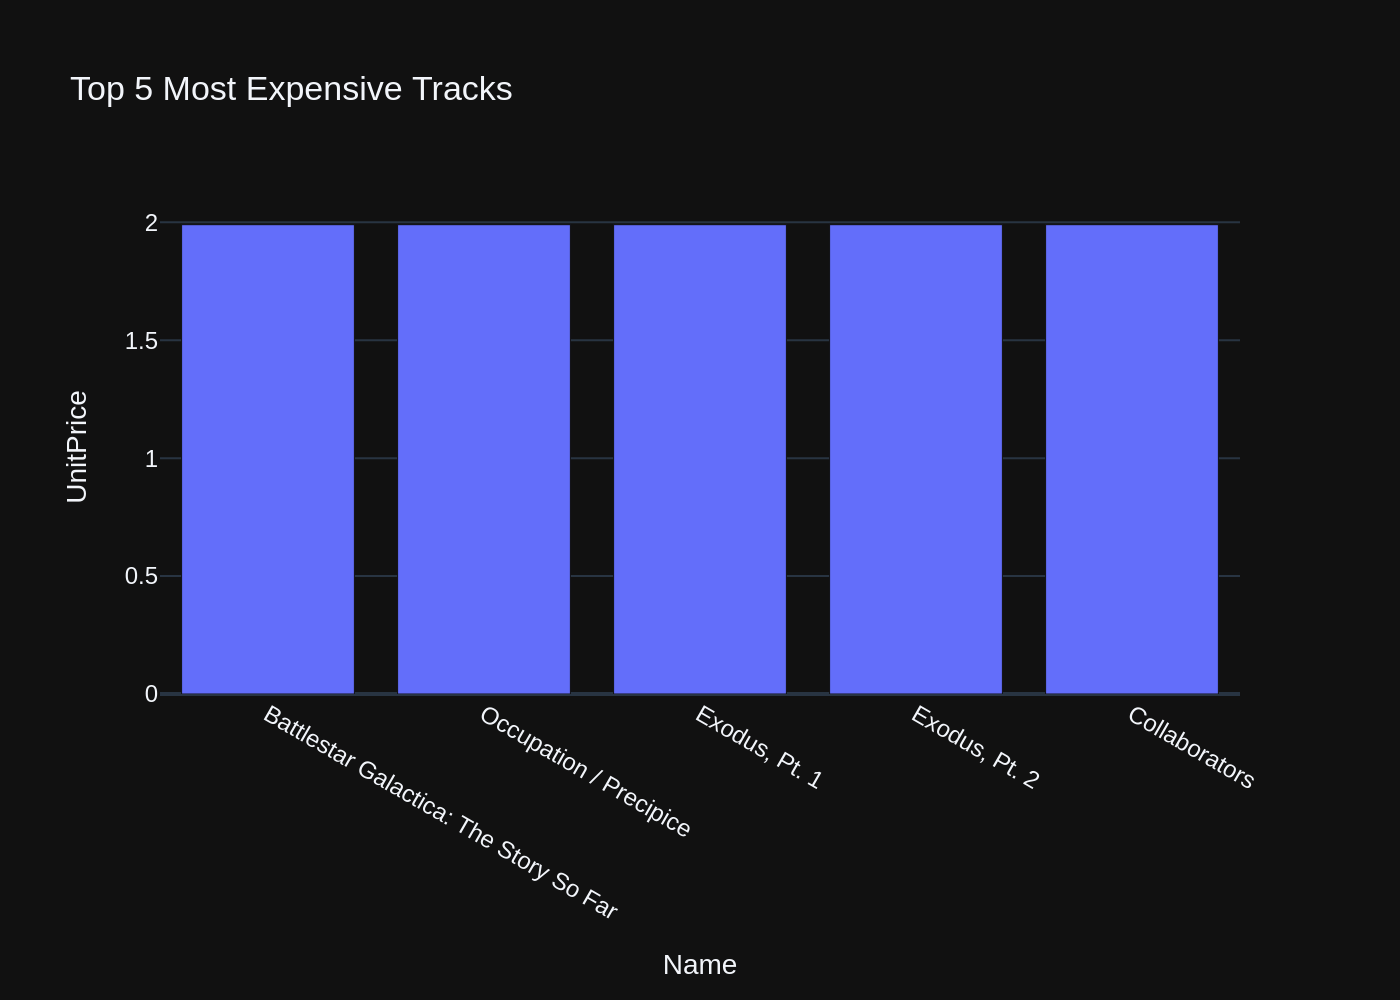

('SELECT Name, UnitPrice FROM Track ORDER BY UnitPrice DESC LIMIT 5',
                                      Name  UnitPrice
 0  Battlestar Galactica: The Story So Far       1.99
 1                  Occupation / Precipice       1.99
 2                           Exodus, Pt. 1       1.99
 3                           Exodus, Pt. 2       1.99
 4                           Collaborators       1.99,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>UnitPrice=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['Battlestar Galactica: The Story So Far', 'Occupation / Precipice',
                           'Exodus, Pt. 1', 'Exodus, Pt. 2', 'Collaborato

In [28]:
question = """  
    Find the top 5 most expensive tracks (based on unit price):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackGenreId ON Track (GenreId)\n\nCREATE TABLE Genre\n(\n  

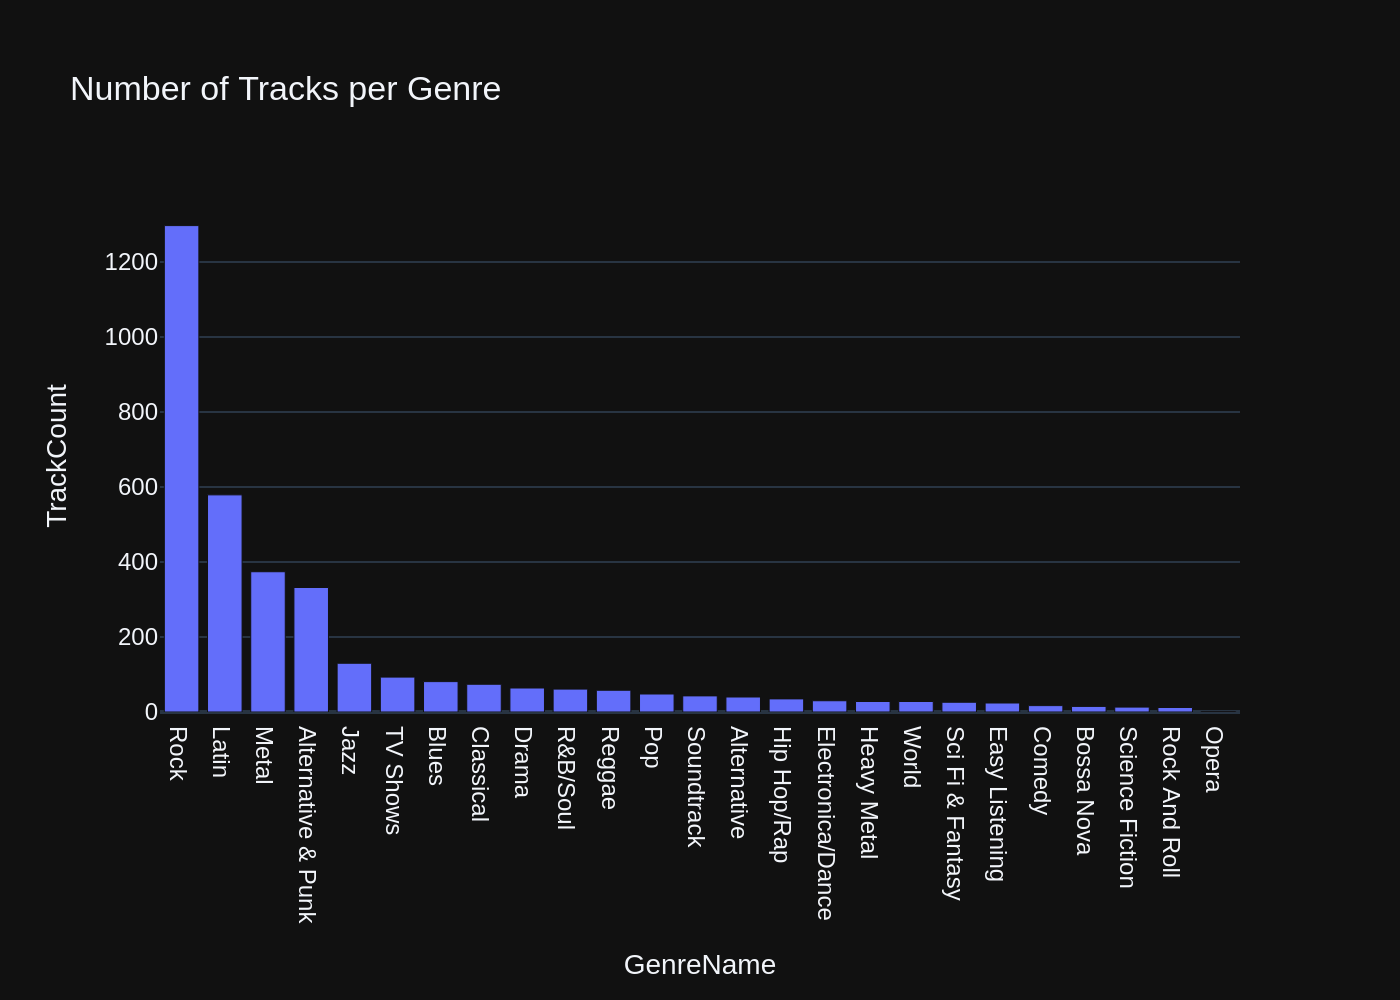

('SELECT g.Name AS GenreName, COUNT(t.TrackId) AS TrackCount FROM Genre g LEFT JOIN Track t ON g.GenreId = t.GenreId GROUP BY g.GenreId, g.Name ORDER BY TrackCount DESC',
              GenreName  TrackCount
 0                 Rock        1297
 1                Latin         579
 2                Metal         374
 3   Alternative & Punk         332
 4                 Jazz         130
 5             TV Shows          93
 6                Blues          81
 7            Classical          74
 8                Drama          64
 9             R&B/Soul          61
 10              Reggae          58
 11                 Pop          48
 12          Soundtrack          43
 13         Alternative          40
 14         Hip Hop/Rap          35
 15   Electronica/Dance          30
 16         Heavy Metal          28
 17               World          28
 18    Sci Fi & Fantasy          26
 19      Easy Listening          24
 20              Comedy          17
 21          Bossa Nova          15
 

In [29]:
question = """  
    List all genres and the number of tracks in each genre:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON Track (GenreId)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_Playlist

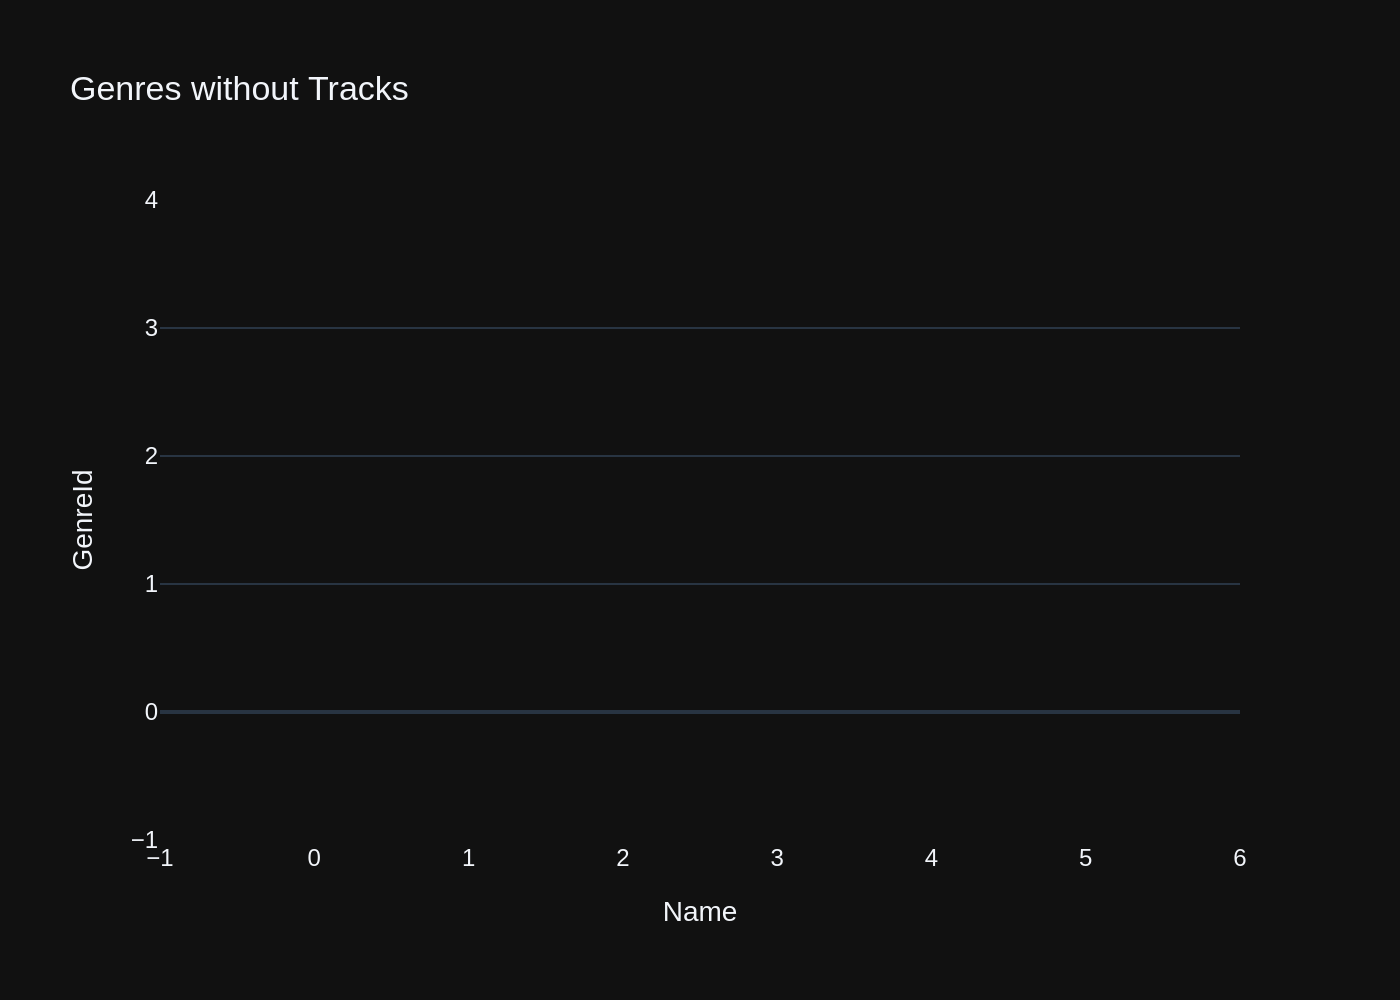

('SELECT GenreId, Name FROM Genre WHERE GenreId NOT IN (SELECT GenreId FROM Track)',
 Empty DataFrame
 Columns: [GenreId, Name]
 Index: [],
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>GenreId=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([], dtype=object),
               'xaxis': 'x',
               'y': array([], dtype=object),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
                'template': '...',
                'title': {'text': 'Genres without Tracks'},
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Name'}},
  

In [30]:
question = """  
    Get all genres that do not have any tracks associated with them:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70)

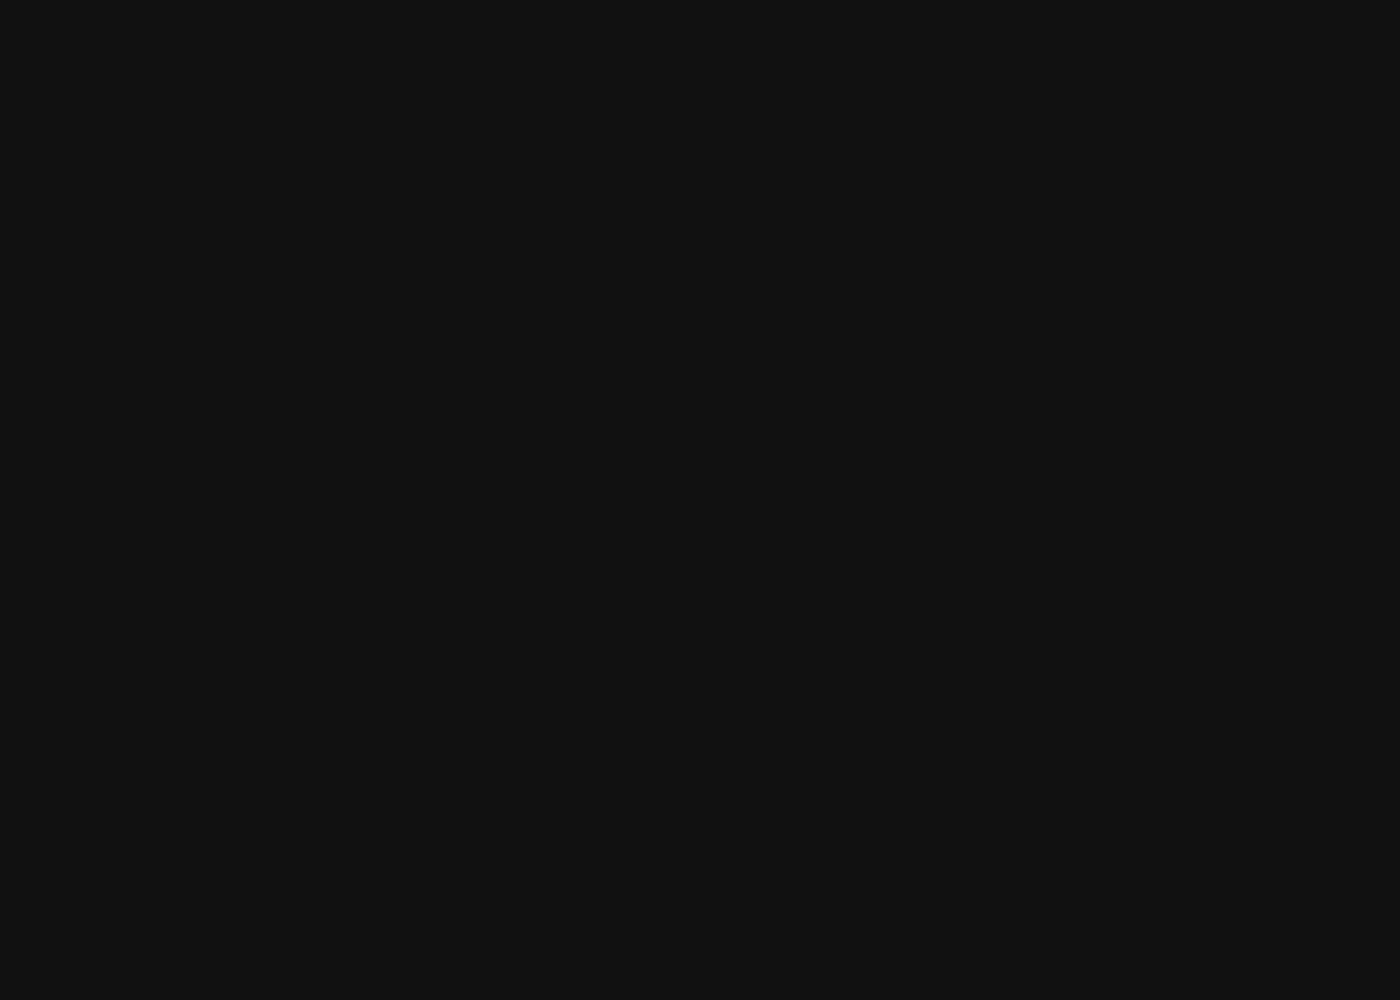

('SELECT * FROM Customer WHERE CustomerId NOT IN (SELECT CustomerId FROM Invoice)',
 Empty DataFrame
 Columns: [CustomerId, FirstName, LastName, Company, Address, City, State, Country, PostalCode, Phone, Fax, Email, SupportRepId]
 Index: [],
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'CustomerId=%{label}<extra></extra>',
               'labels': array([], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie'}],
     'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
 }))

In [31]:
question = """  
    List all customers who have not placed any orders:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Album\n(\n    AlbumId INTEGER  NOT NULL,\n    Title NVARCHAR(160)  NOT NULL,\n    ArtistId INTEGER  NOT NULL,\n    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),\n    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KE

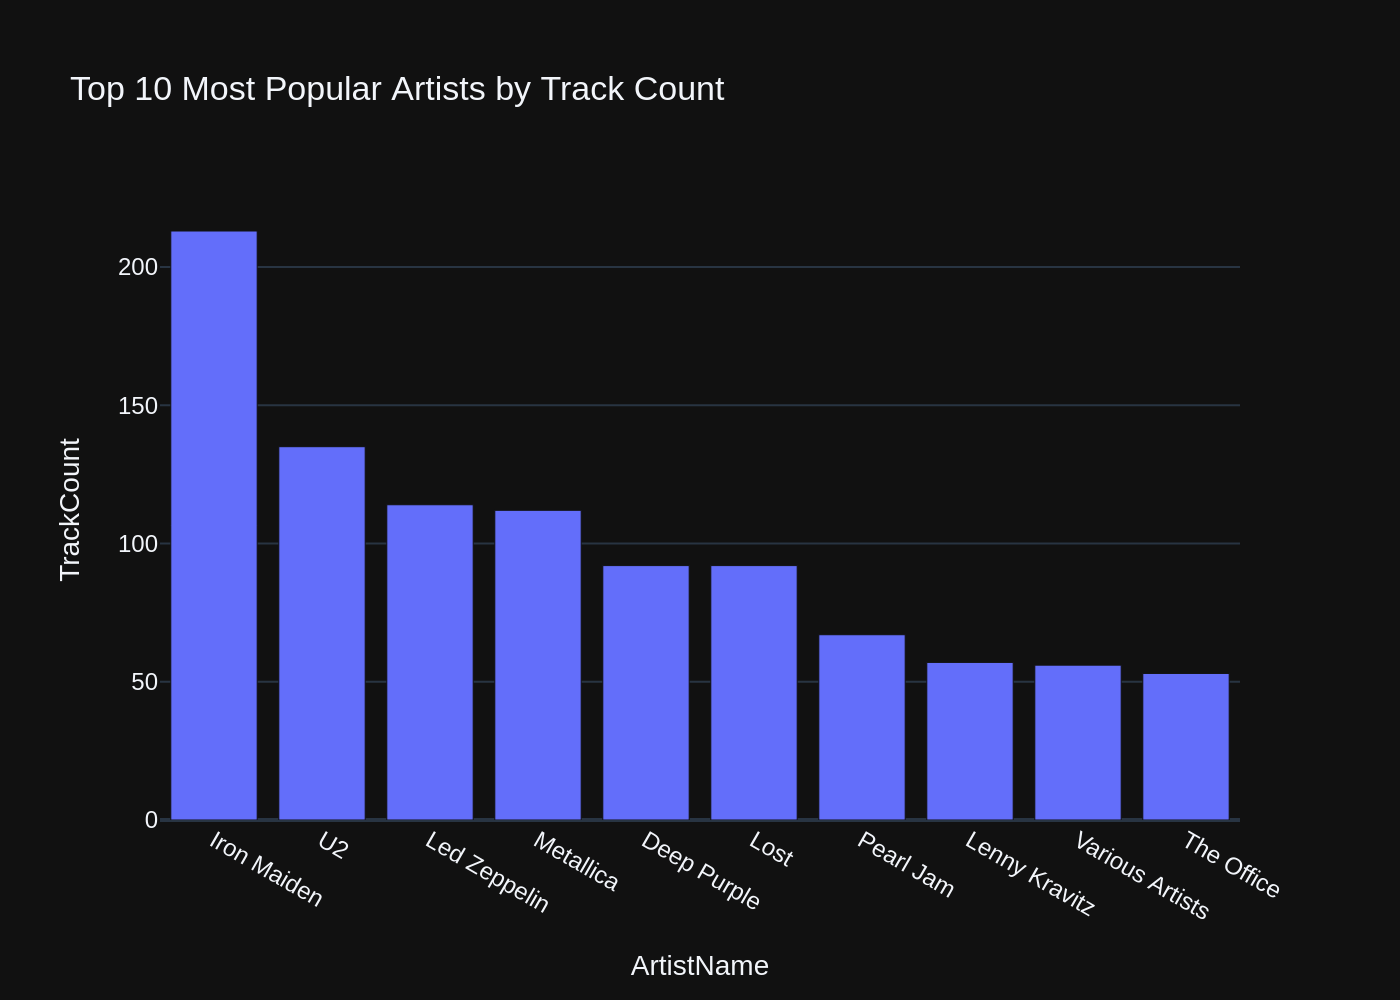

('SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS TrackCount \nFROM Artist a \nJOIN Album al ON a.ArtistId = al.ArtistId \nJOIN Track t ON al.AlbumId = t.AlbumId \nGROUP BY a.ArtistId, a.Name \nORDER BY TrackCount DESC \nLIMIT 10',
         ArtistName  TrackCount
 0      Iron Maiden         213
 1               U2         135
 2     Led Zeppelin         114
 3        Metallica         112
 4      Deep Purple          92
 5             Lost          92
 6        Pearl Jam          67
 7    Lenny Kravitz          57
 8  Various Artists          56
 9       The Office          53,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'ArtistName=%{x}<br>TrackCount=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',


In [32]:
question = """ 
    There are 3 tables: artists, albums and tracks, where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    Can you find the top 10 most popular artists based on the number of tracks
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON Customer (SupportRepId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n

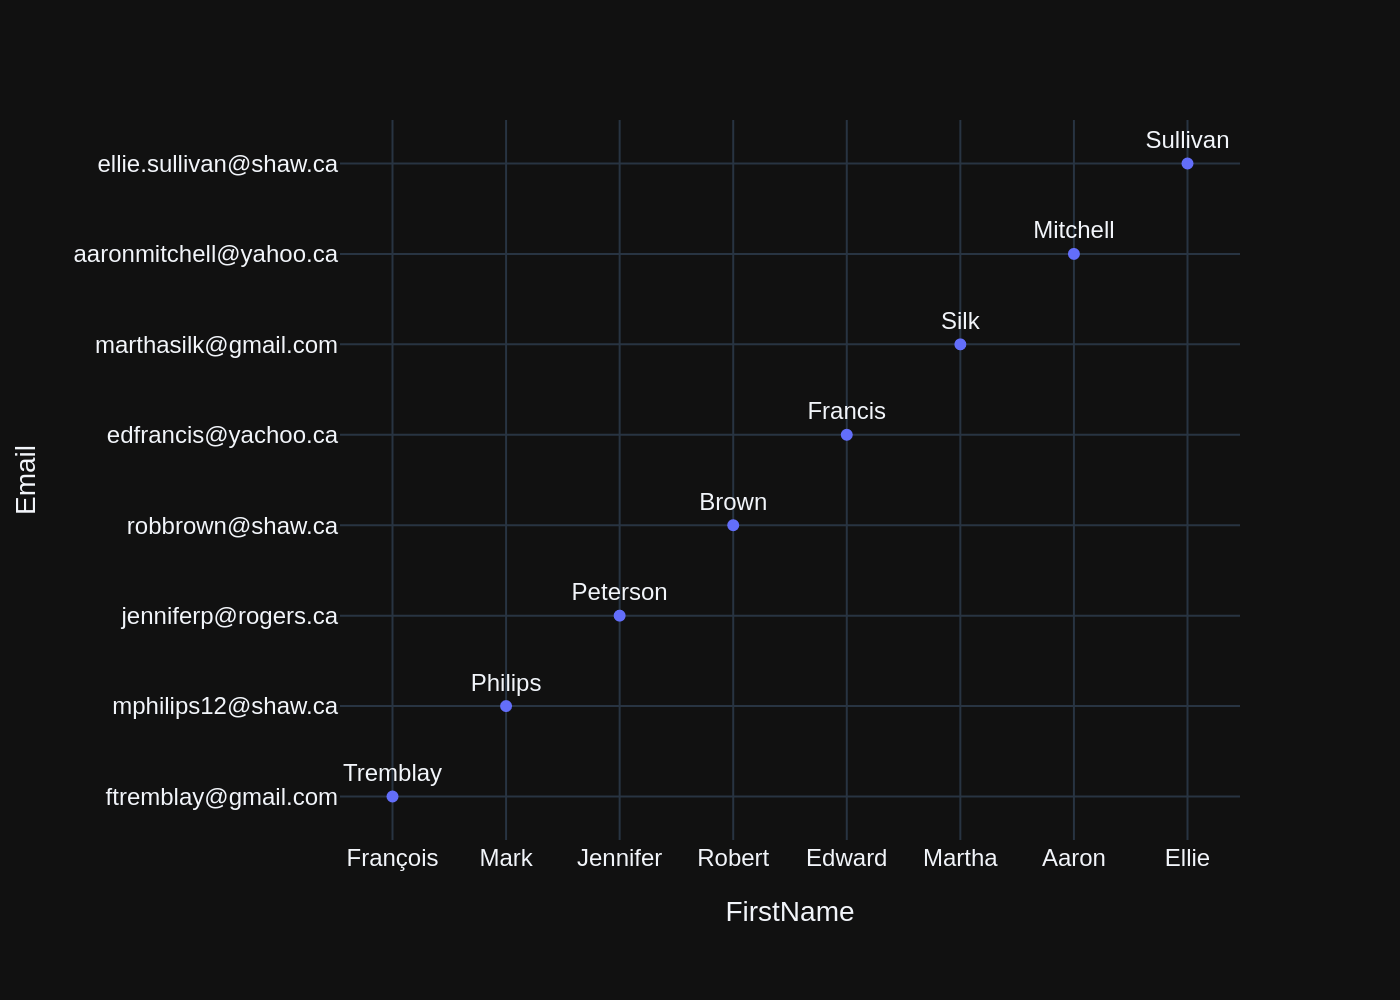

("SELECT FirstName, LastName, Email FROM Customer WHERE Country = 'Canada'",
   FirstName  LastName                   Email
 0  François  Tremblay     ftremblay@gmail.com
 1      Mark   Philips      mphilips12@shaw.ca
 2  Jennifer  Peterson     jenniferp@rogers.ca
 3    Robert     Brown        robbrown@shaw.ca
 4    Edward   Francis     edfrancis@yachoo.ca
 5    Martha      Silk    marthasilk@gmail.com
 6     Aaron  Mitchell  aaronmitchell@yahoo.ca
 7     Ellie  Sullivan  ellie.sullivan@shaw.ca,
 Figure({
     'data': [{'hovertemplate': 'FirstName=%{x}<br>Email=%{y}<br>LastName=%{text}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers+text',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'text': array(['Tremblay', 'Philips', 'Peterson', 'Brown', 'Francis', 'Silk',
                              'Mitchell', 'Sullivan'], dtyp

In [33]:
question = """  
     List all customers from Canada and their email addresses:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_InvoiceCustomerId ON Invoice (CustomerId)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON InvoiceLine (InvoiceId)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    Trac

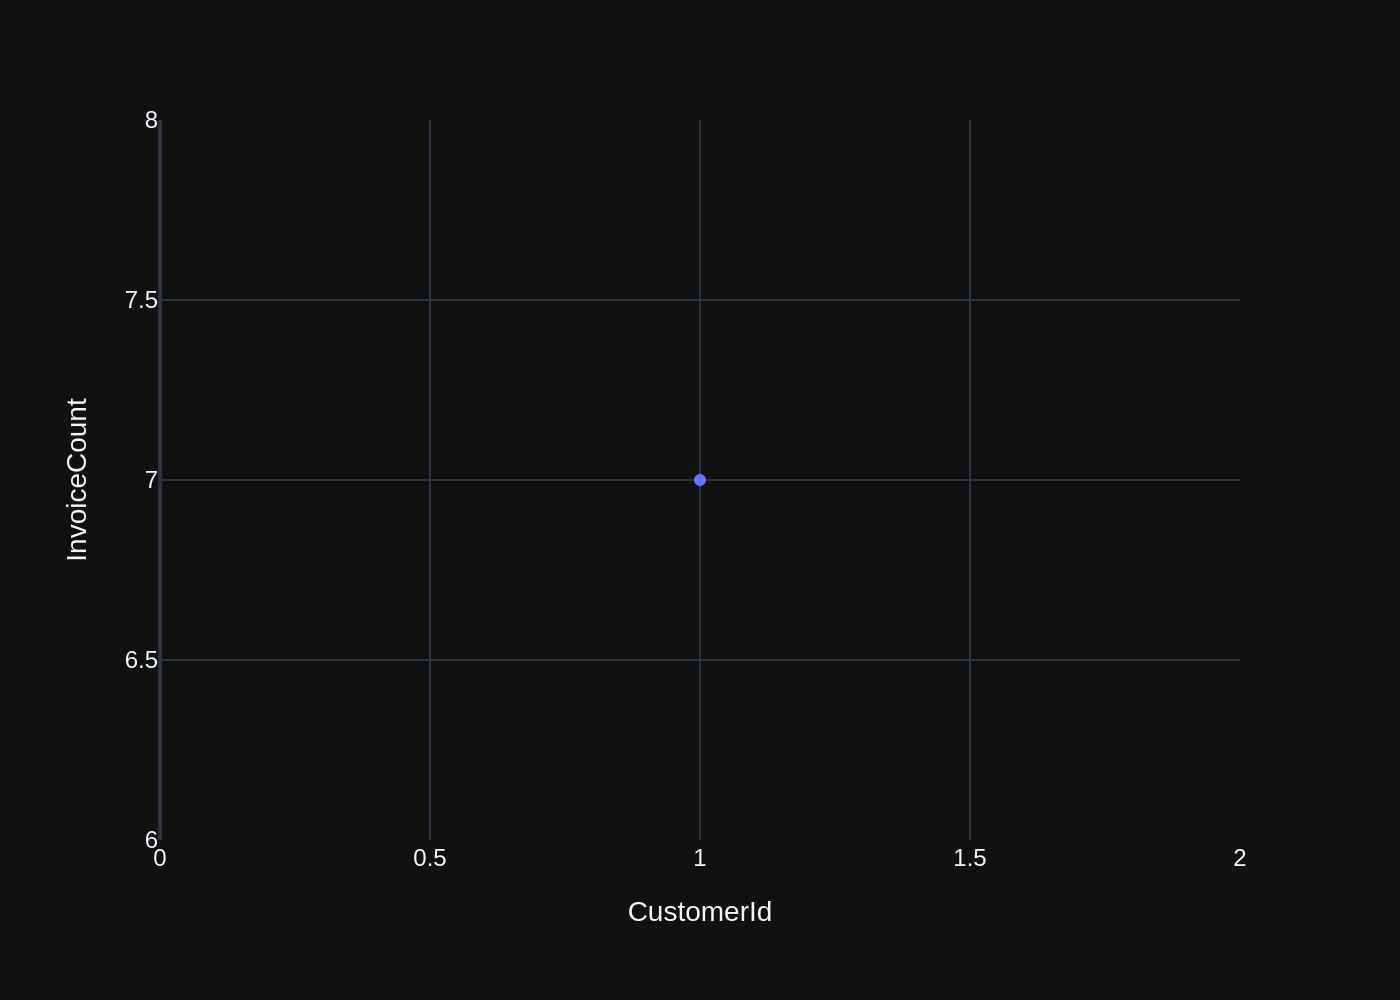

('SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount \nFROM Customer c \nLEFT JOIN Invoice i ON c.CustomerId = i.CustomerId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY InvoiceCount DESC LIMIT 1',
    CustomerId FirstName   LastName  InvoiceCount
 0           1      Luís  Gonçalves             7,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{x}<br>InvoiceCount=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([1]),
               'xaxis': 'x',
               'y': array([7]),
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain'

In [34]:
question = """  
     Find the customer with the most invoices 
"""

vn.ask(question=question)

### Advanced SQL questions

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Album\n(\n    AlbumId INTEGER  NOT NULL,\n    Title NVARCHAR(160

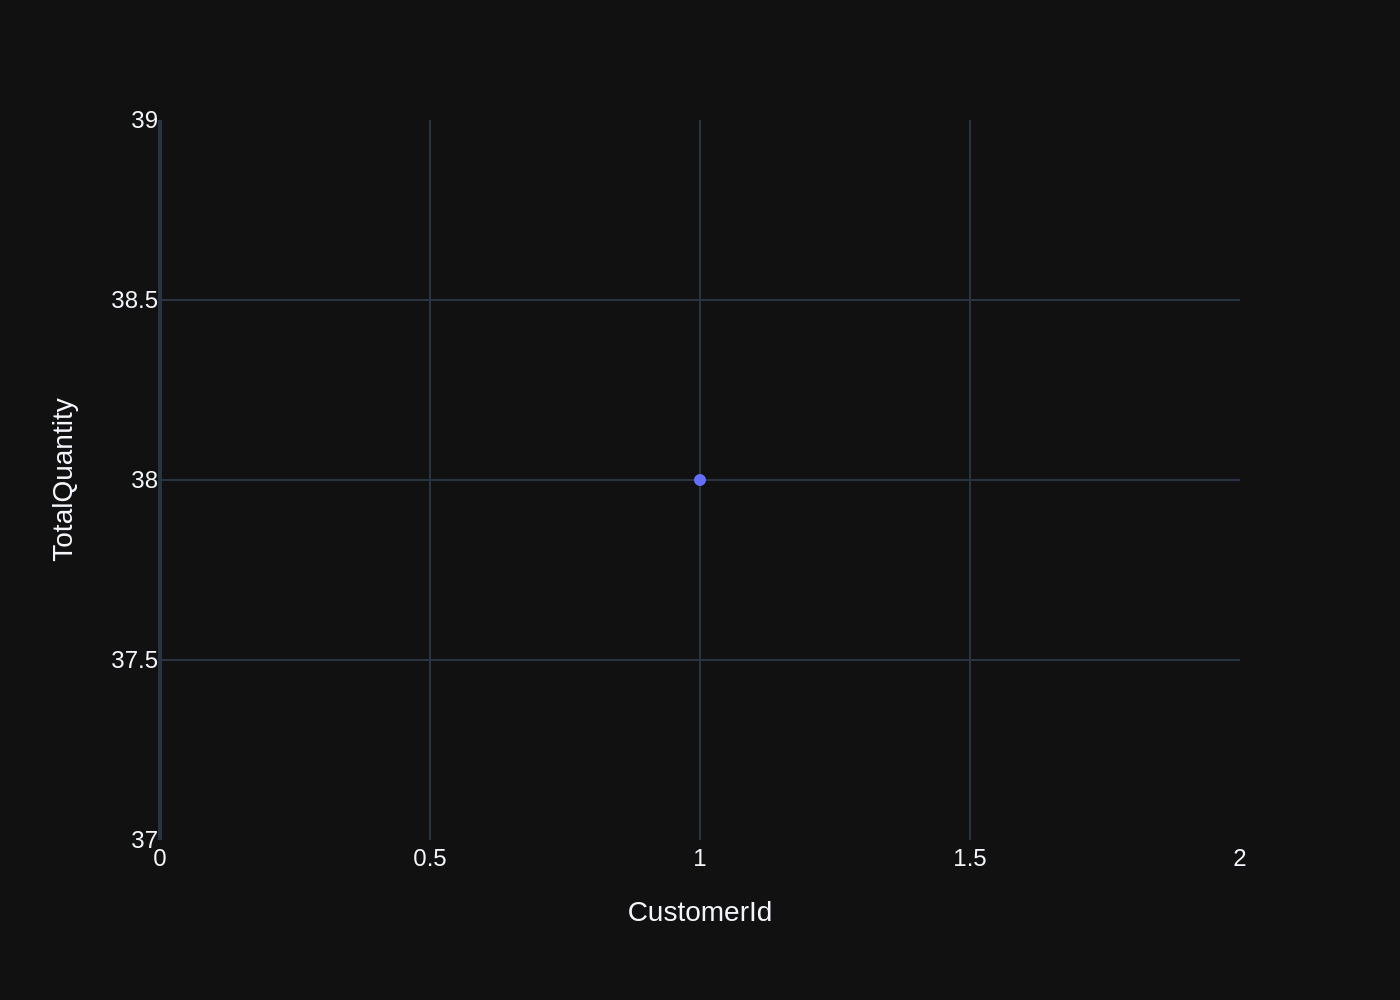

('SELECT c.CustomerId, c.FirstName, c.LastName, SUM(il.Quantity) AS TotalQuantity \nFROM Customer c \nJOIN Invoice i ON c.CustomerId = i.CustomerId \nJOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY TotalQuantity DESC LIMIT 1',
    CustomerId FirstName   LastName  TotalQuantity
 0           1      Luís  Gonçalves             38,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{x}<br>TotalQuantity=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([1]),
               'xaxis': 'x',
               'y': array([38]),
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...'

In [35]:
question = """  
     Find the customer who bought the most albums in total quantity (across all invoices): 
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Album\n(\n    AlbumId INTEGER  NOT NULL,\n    Title NVARCHAR(160)  NOT NULL,\n    ArtistId INTEGER  NOT NULL,\n    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),\n    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KE

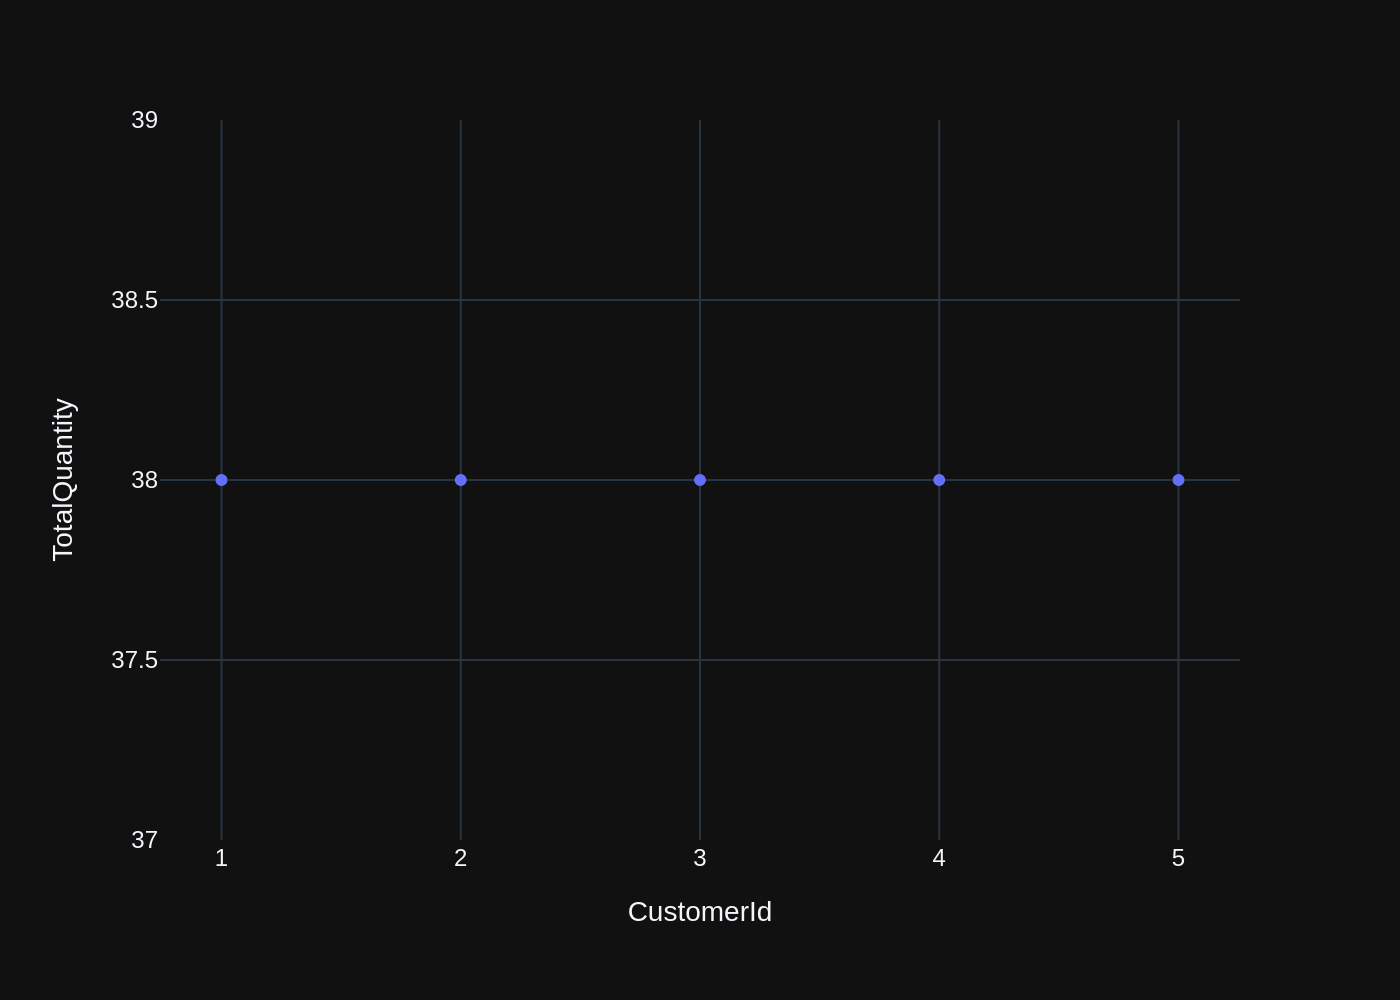

('SELECT c.CustomerId, c.FirstName, c.LastName, SUM(il.Quantity) AS TotalQuantity \nFROM Customer c \nJOIN Invoice i ON c.CustomerId = i.CustomerId \nJOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId \nJOIN Track t ON il.TrackId = t.TrackId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY TotalQuantity DESC LIMIT 5',
    CustomerId  FirstName     LastName  TotalQuantity
 0           1       Luís    Gonçalves             38
 1           2     Leonie       Köhler             38
 2           3   François     Tremblay             38
 3           4      Bjørn       Hansen             38
 4           5  František  Wichterlová             38,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{x}<br>TotalQuantity=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
              

In [36]:
question = """  
    Hint: album quantity is found in invoice_items, 
    
    Find the top 5 customers who bought the most albums in total quantity (across all invoices):
"""

vn.ask(question=question)

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    BillingCity NVARCHAR(40),\n    BillingState NVARCHAR(40),\n    BillingCountry NVARCHAR(40),\n    BillingPostalCode NVARCHAR(10),\n    Total NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Invoice PRIMARY KEY  (InvoiceId),\n    FOREIGN KEY (CustomerId) REFERENCES Customer (CustomerId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    TrackId INTEGER  NOT NULL,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    Quantity INTEGER  NOT NULL,\n    CONSTRAINT PK_InvoiceLine PRI

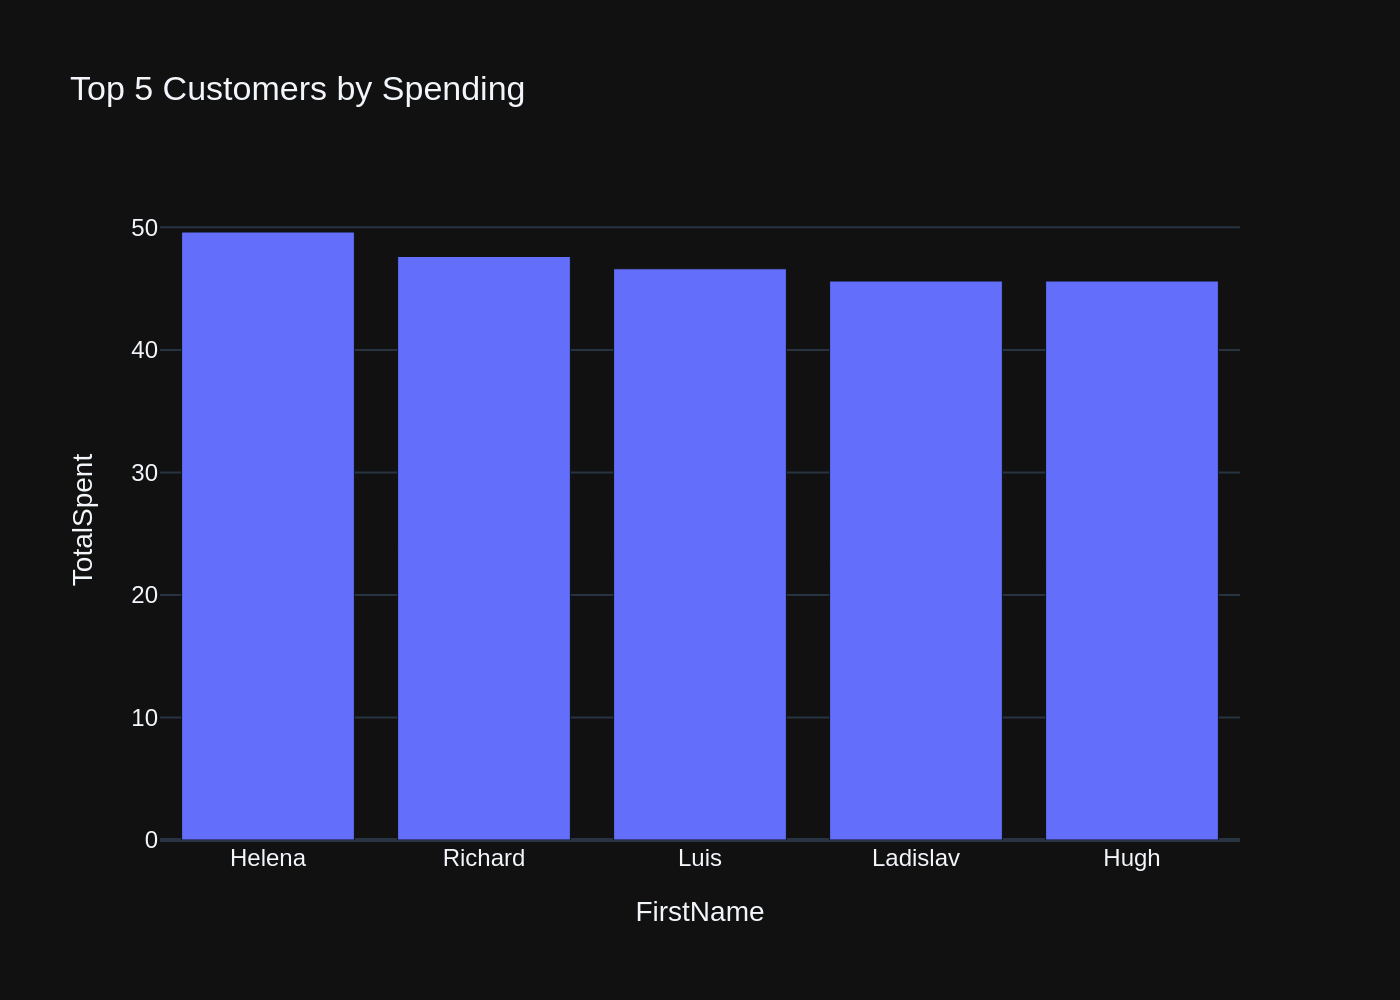

('SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent \nFROM Customer c \nJOIN Invoice i ON c.CustomerId = i.CustomerId \nGROUP BY c.CustomerId, c.FirstName, c.LastName \nORDER BY TotalSpent DESC LIMIT 5',
    CustomerId FirstName    LastName  TotalSpent
 0           6    Helena        Holý       49.62
 1          26   Richard  Cunningham       47.62
 2          57      Luis       Rojas       46.62
 3          45  Ladislav      Kovács       45.62
 4          46      Hugh    O'Reilly       45.62,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'FirstName=%{x}<br>TotalSpent=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['Helena'

In [37]:
question = """  
     Find the top 5 customers who spent the most money overall, 
     
     Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_PlaylistTrackTrackId ON PlaylistTrack (TrackId)\n\nCREATE TABLE Playlist\n(\n    PlaylistId INTEGER  NOT NULL,\n    Name NVARCHAR(120),\n    CONSTRAINT PK_Playlist PRIMARY KEY  (PlaylistId)\n)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON 

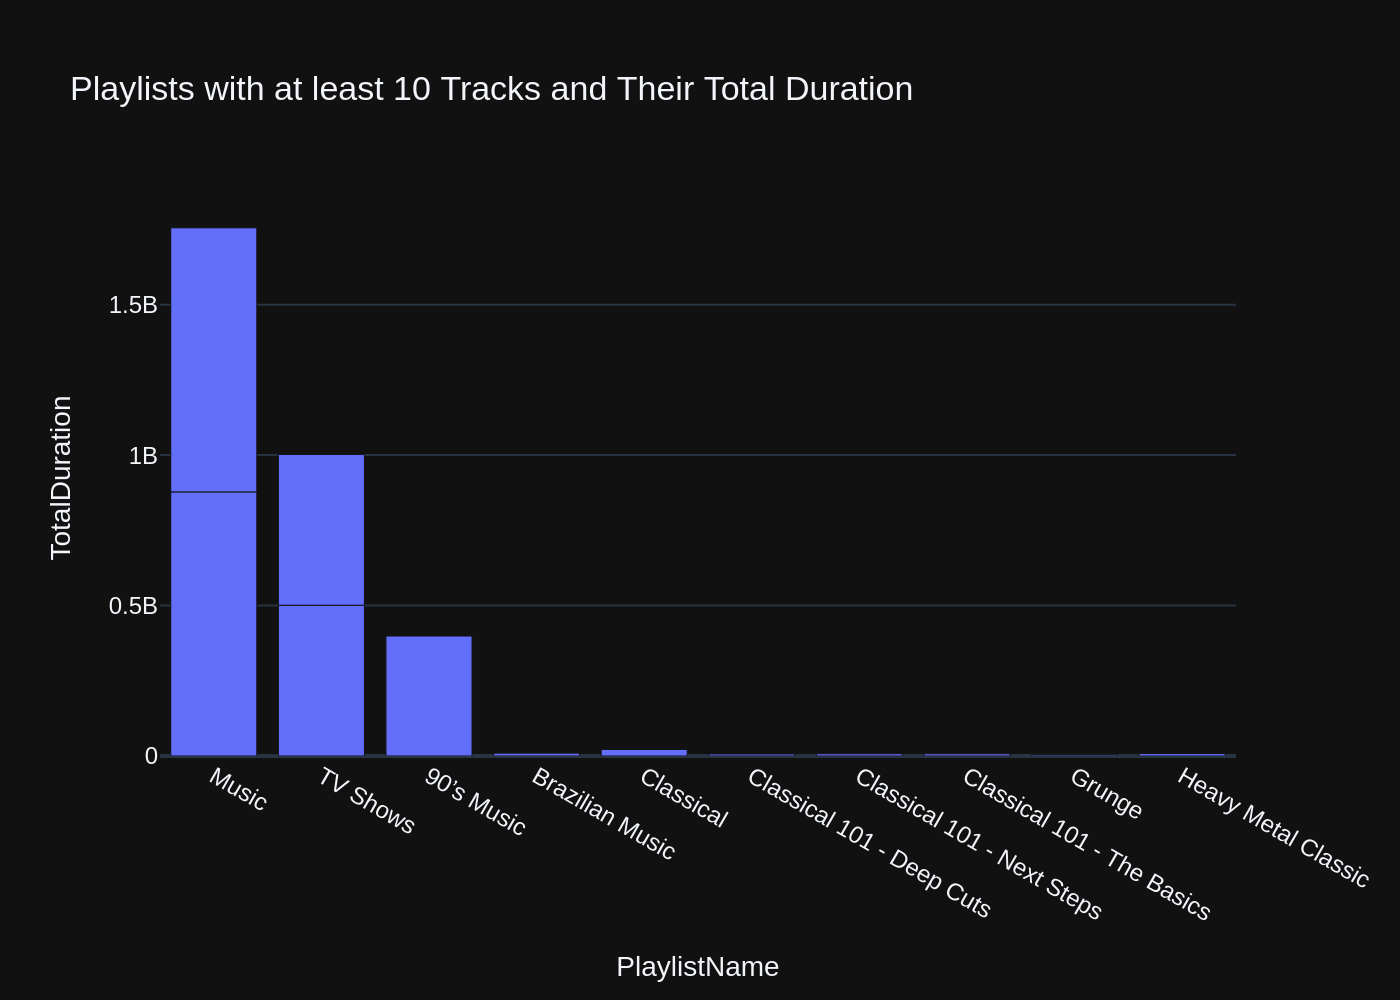

('SELECT p.Name AS PlaylistName, SUM(t.Milliseconds) AS TotalDuration \nFROM Playlist p \nJOIN PlaylistTrack pt ON p.PlaylistId = pt.PlaylistId \nJOIN Track t ON pt.TrackId = t.TrackId \nGROUP BY p.PlaylistId, p.Name \nHAVING COUNT(pt.TrackId) >= 10',
                   PlaylistName  TotalDuration
 0                        Music      877683083
 1                     TV Shows      501094957
 2                   90’s Music      398705153
 3                        Music      877683083
 4                     TV Shows      501094957
 5              Brazilian Music        9486559
 6                    Classical       21770592
 7    Classical 101 - Deep Cuts        6755730
 8   Classical 101 - Next Steps        7575051
 9   Classical 101 - The Basics        7439811
 10                      Grunge        4122018
 11         Heavy Metal Classic        8206312,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'PlaylistName=%{x}<br>TotalDuration=%{y}<extra></extr

In [38]:
question = """  
     Get all playlists containing at least 10 tracks and the total duration of those tracks:
"""

vn.ask(question=question)

In [39]:
question = """  
     Identify artists who have albums with tracks appearing in multiple genres:


"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON Album (ArtistId)\n\nCREATE TABLE Track\n(\n    TrackId INTEGER  NOT NULL,\n    Name NVARCHAR(200)  NOT NULL,\n    AlbumId INTEGER,\n    MediaTypeId INTEGER  NOT NULL,\n    GenreId INTEGER,\n    Composer NVARCHAR(220),\n    Milliseconds INTEGER  NOT NULL,\n    Bytes INTEGER,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT PK_Track PRIMARY KEY  (TrackId),\n    FOREIGN KEY (AlbumId) REFERENCES Album (AlbumId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (GenreId) REFERENCES Genre (GenreId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (MediaTypeId) REFERENCES MediaType (MediaTypeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX IFK_TrackG

### Check completion time

In [40]:
ts_stop = time()

elapsed_time = ts_stop - ts_start
print(f"test running on '{hostname}' with '{model_name}' LLM took : {elapsed_time:.2f} sec")

test running on 'papa-game' with 'qwen2.5' LLM took : 2573.07 sec


## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the 
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
